# Data Collection
##  [Dataset](https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020)

### The dataset consists of two CSV files containing ball-by-ball and match-by-match data till the 2024 season.

# Required Modules

In [1]:
import pandas as pd # Data Manipulation
import numpy as np # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from tabulate import tabulate # Data Visualization

In [2]:
#Loading the data
matches = pd.read_csv('matches.csv')
balls = pd.read_csv('deliveries.csv')

# Data Cleaning and Preprocessing

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 1. Handling missing values for abandoned matches
### 2. Handling missing values for matches with the Duckworth-Lewis System (DLS)
### 3. Correcting the season and team name values
### 4. Adding a column for denoting the match numbers

In [4]:
matches['player_of_match'].fillna('Match abandoned',inplace=True)
matches['winner'].fillna('Match abandoned',inplace=True)
matches['result_margin'][matches['result']=='tie'].fillna('Match tied',inplace=True)
matches['result_margin'].fillna('No result',inplace=True)
matches['result'].fillna('Match abandoned',inplace=True)
matches['target_runs'].fillna('Match abandoned',inplace=True)
matches['target_overs'].fillna('Match abandoned',inplace=True)
matches['method'].fillna('N',inplace=True)
matches.loc[matches['season']=='2007/08','season']='2008'
matches.loc[matches['season']=='2009/10','season']='2010'
matches.loc[matches['season']=='2020/21','season']='2020'
matches.loc[matches['method']=='D/L','method']='Y'
matches.loc[matches['venue']=='Sharjah Cricket Stadium','city']='Sharjah'
matches.loc[matches['venue']=='Dubai International Cricket Stadium','city']='Dubai'
matches.loc[matches['venue']=='M.Chinnaswamy Stadium','venue']='M Chinnaswamy Stadium'
matches.loc[matches['team1']=='Rising Pune Supergiant','team1']='Rising Pune Supergiants'
matches.loc[matches['team2']=='Rising Pune Supergiant','team2']='Rising Pune Supergiants'
matches.loc[matches['team1']=='Royal Challengers Bangalore','team1']='Royal Challengers Bengaluru'
matches.loc[matches['team2']=='Royal Challengers Bangalore','team2']='Royal Challengers Bengaluru'
matches.loc[matches['toss_winner']=='Rising Pune Supergiant','toss_winner']='Rising Pune Supergiants'
matches.loc[matches['winner']=='Rising Pune Supergiant','winner']='Rising Pune Supergiants'
matches.loc[matches['toss_winner']=='Royal Challengers Bangalore','toss_winner']='Royal Challengers Bengaluru'
matches.loc[matches['winner']=='Royal Challengers Bangalore','winner']='Royal Challengers Bengaluru'
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.replace('Kings XI Punjab','Punjab Kings',inplace=True)
matches['Match_No']=list(range(1,len(list(matches['id'].unique()))+1))

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1095 non-null   int64 
 1   season           1095 non-null   object
 2   city             1095 non-null   object
 3   date             1095 non-null   object
 4   match_type       1095 non-null   object
 5   player_of_match  1095 non-null   object
 6   venue            1095 non-null   object
 7   team1            1095 non-null   object
 8   team2            1095 non-null   object
 9   toss_winner      1095 non-null   object
 10  toss_decision    1095 non-null   object
 11  winner           1095 non-null   object
 12  result           1095 non-null   object
 13  result_margin    1095 non-null   object
 14  target_runs      1095 non-null   object
 15  target_overs     1095 non-null   object
 16  super_over       1095 non-null   object
 17  method           1095 non-null   

In [6]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
id_to_season = {}
for row in range(len(matches)):
    id_to_season[matches.loc[row,'id']] = matches.loc[row,'season']

In [8]:
balls['Year'] = balls['match_id'].map(id_to_season)

### Filling the missing values appropriately in fielder, player_dismissed, dismissal_kind and extras_type column

In [9]:
balls.loc[pd.isna(balls['player_dismissed'])==True,'fielder']='Not dismissed'
balls.loc[pd.isna(balls['player_dismissed'])==True,'player_dismissed']='Not dismissed'
balls.loc[pd.isna(balls['dismissal_kind'])==True,'dismissal_kind']='Not dismissed'	
balls.loc[pd.isna(balls['fielder'])==True,'fielder']='OMD'
balls.loc[(pd.isna(balls['extras_type'])==True),'extras_type']='No extras'
balls.rename(columns={'match_id': 'id'},inplace=True)
for row in range(len(balls)):
    if balls.iloc[row]['dismissal_kind']=='caught and bowled':
        balls['fielder'].replace({balls.iloc[row]['fielder'],balls.iloc[row]['bowler']}, inplace=True)

In [10]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

### Adding Match No. in the ball-by-ball dataset

In [11]:
balls['Match_No'] = np.nan
match_no=1
for row in balls['id'].unique():
    balls['Match_No'].fillna(match_no, inplace=True)
    match_no+=1

### Correcting the error in team(franchise) naming

In [12]:
balls.loc[balls['batting_team']=='Rising Pune Supergiants','batting_team']='Rising Pune Supergiant'
balls.loc[balls['bowling_team']=='Rising Pune Supergiants','bowling_team']='Rising Pune Supergiant'
balls.loc[balls['batting_team']=='Royal Challengers Bangalore','batting_team']='Royal Challengers Bengaluru'
balls.loc[balls['bowling_team']=='Royal Challengers Bangalore','bowling_team']='Royal Challengers Bengaluru'
balls.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
balls.replace('Kings XI Punjab','Punjab Kings',inplace=True)


In [13]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       260920 non-null  object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  260920 non-null  object 
 15  dismissal_kind    260920 non-null  object 
 16  fielder           26

In [14]:
matches.drop_duplicates(inplace=True)
balls.drop_duplicates(inplace=True)

## Team Records

#### Total Wins and Win-loss ratio

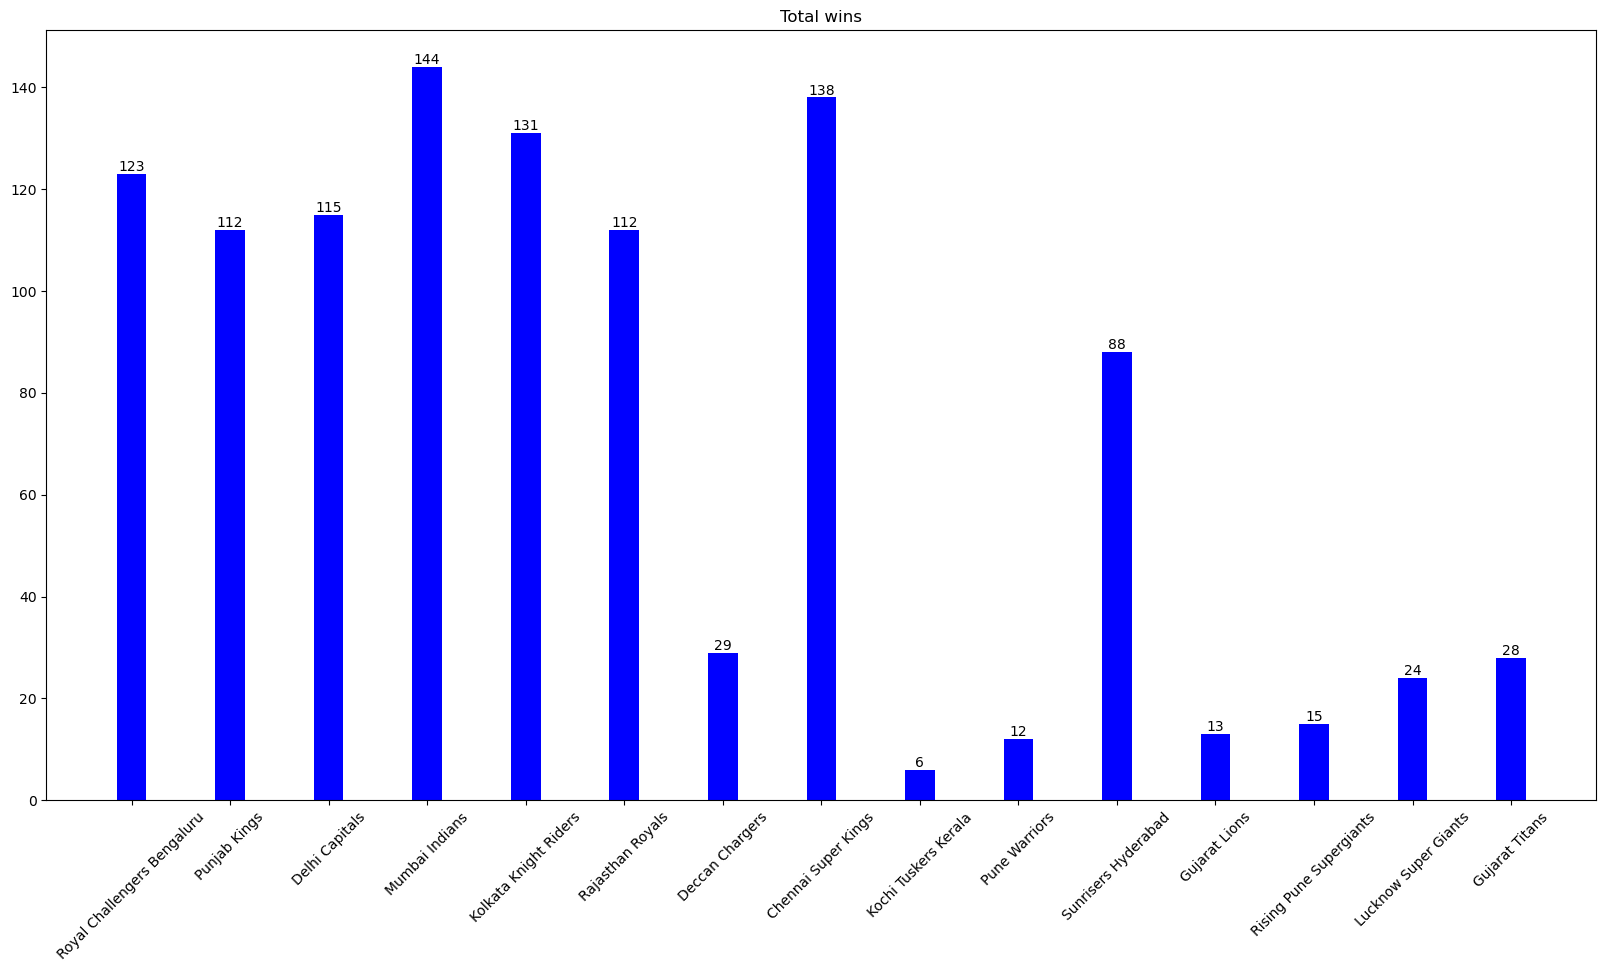

+---------------------+-----------------------------+------+--------+
|   Win/Loss Ratio    |            Team             | Wins | Losses |
+---------------------+-----------------------------+------+--------+
| 1.6470588235294117  |       Gujarat Titans        |  28  |   17   |
|        1.38         |     Chennai Super Kings     | 138  |  100   |
| 1.2307692307692308  |       Mumbai Indians        | 144  |  117   |
|         1.2         |    Lucknow Super Giants     |  24  |   20   |
| 1.0916666666666666  |    Kolkata Knight Riders    | 131  |  120   |
| 1.0275229357798166  |      Rajasthan Royals       | 112  |  109   |
|         1.0         |   Rising Pune Supergiants   |  15  |   15   |
| 0.9361702127659575  |     Sunrisers Hyderabad     |  88  |   94   |
| 0.9318181818181818  | Royal Challengers Bengaluru | 123  |  132   |
| 0.8394160583941606  |       Delhi Capitals        | 115  |  137   |
|  0.835820895522388  |        Punjab Kings         | 112  |  134   |
| 0.7647058823529411

In [15]:
#Win-loss ratio for each team
WON = []
LOST = []
TEAM = []
for match in matches['team1'].unique():
    WON.append(matches['winner'][(matches['winner']==match)].count())
    LOST.append(matches['team1'][(matches['winner']!=match) & (matches['team1']==match) ].count()+matches['team2'][(matches['winner']!=match) & (matches['team2']==match) & (matches['result']!='Match abandoned')].count())
    TEAM.append(match)
fig = plt.figure(figsize = (20, 10))
# creating the bar plot
BARS = plt.bar(TEAM, WON, color ='blue',width = 0.3)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Total wins')
plt.show()
TABLE = []
for i in range(0,len(WON)):
    TABLE.append((WON[i]/LOST[i],TEAM[i],WON[i],LOST[i]))
    
TABLE.sort(reverse=True)
TABLE.insert(0,('Win/Loss Ratio','Team','Wins','Losses'))
print(tabulate(TABLE,headers="firstrow",tablefmt="pretty"))

#### Total players to play for each franchise

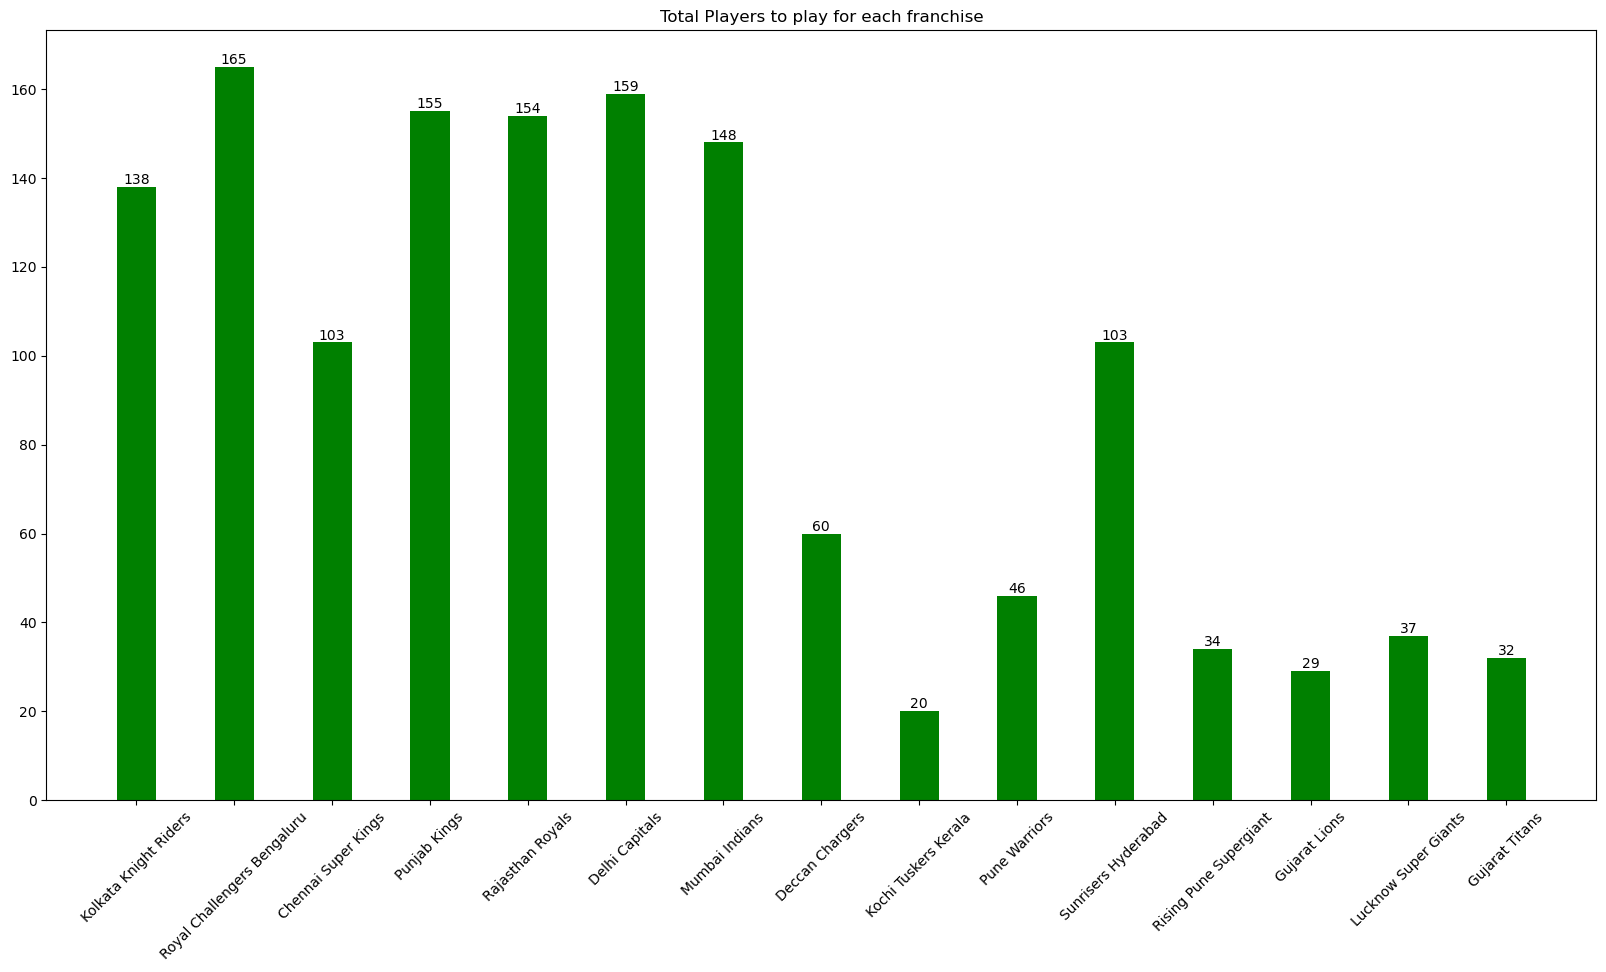

In [16]:
Players_with_team = []
for row in list(balls['batting_team'].unique()):
    Players_with_team.append((list(balls['batter'][(balls['batting_team']==row)].unique())+list(balls['bowler'][(balls['bowling_team']==row)].unique()),row))

Unique_players_with_team = []
for players in Players_with_team:
    Players = []
    for player in players[0]:
        if player not in Players:
            Players.append(player)
    Unique_players_with_team.append((len(Players),players[1]))
fig = plt.figure(figsize = (20, 10))
Total_players = []
Team = []
for player in Unique_players_with_team:
    Total_players.append(player[0])
    Team.append(player[1])
BARS = plt.bar(Team, Total_players, color ='green',width = 0.4)
for BAR in BARS:
    plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title("Total Players to play for each franchise")
plt.show()

### Top 10 biggest margin wins with respect to runs

In [17]:
matches[['result_margin','team1','team2','winner','date']][matches['result']=='runs'].sort_values('result_margin',ascending=False)[0:10]

,result_margin,team1,team2,winner,date
620,146.0,Delhi Capitals,Mumbai Indians,Mumbai Indians,2017-05-06
560,144.0,Royal Challengers Bengaluru,Gujarat Lions,Royal Challengers Bengaluru,2016-05-14
0,140.0,Royal Challengers Bengaluru,Kolkata Knight Riders,Kolkata Knight Riders,2008-04-18
496,138.0,Royal Challengers Bengaluru,Punjab Kings,Royal Challengers Bengaluru,2015-05-06
352,130.0,Royal Challengers Bengaluru,Pune Warriors,Royal Challengers Bengaluru,2013-04-23
706,118.0,Sunrisers Hyderabad,Royal Challengers Bengaluru,Sunrisers Hyderabad,2019-03-31
1009,112.0,Royal Challengers Bengaluru,Rajasthan Royals,Royal Challengers Bengaluru,2023-05-14
236,111.0,Punjab Kings,Royal Challengers Bengaluru,Punjab Kings,2011-05-17
1039,106.0,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,2024-04-03
55,105.0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,2008-05-30


### Top 10 narrowest margin wins with respect to runs

In [18]:
matches[['result_margin','team1','team2','winner','date']][matches['result']=='runs'].sort_values('result_margin',ascending=True)[0:10].reset_index()

,index,result_margin,team1,team2,winner,date
0,635,1.0,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,2017-05-21
1,104,1.0,Deccan Chargers,Punjab Kings,Punjab Kings,2009-05-17
2,555,1.0,Punjab Kings,Royal Challengers Bengaluru,Royal Challengers Bengaluru,2016-05-09
3,44,1.0,Mumbai Indians,Punjab Kings,Punjab Kings,2008-05-21
4,837,1.0,Royal Challengers Bengaluru,Delhi Capitals,Royal Challengers Bengaluru,2021-04-27
5,290,1.0,Pune Warriors,Mumbai Indians,Mumbai Indians,2012-05-03
6,284,1.0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2012-04-29
7,459,1.0,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,2015-04-09
8,1017,1.0,Lucknow Super Giants,Kolkata Knight Riders,Lucknow Super Giants,2023-05-20
9,734,1.0,Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru,2019-04-21


### Top 10 biggest margin wins with respect to wickets

In [19]:
matches[['result_margin','team1','team2','winner','date']][matches['result']=='wickets'].sort_values('result_margin',ascending=False)[0:10].reset_index()

,index,result_margin,team1,team2,winner,date
0,239,10.0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,2011-05-20
1,482,10.0,Delhi Capitals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,2015-04-26
2,796,10.0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,2020-10-23
3,683,10.0,Punjab Kings,Royal Challengers Bengaluru,Royal Challengers Bengaluru,2018-05-14
4,811,10.0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,2020-11-03
5,60,10.0,Delhi Capitals,Punjab Kings,Delhi Capitals,2009-04-19
6,831,10.0,Rajasthan Royals,Royal Challengers Bengaluru,Royal Challengers Bengaluru,2021-04-22
7,611,10.0,Punjab Kings,Delhi Capitals,Punjab Kings,2017-04-30
8,124,10.0,Royal Challengers Bengaluru,Rajasthan Royals,Royal Challengers Bengaluru,2010-03-18
9,579,10.0,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,2017-04-07


### Top 10 narrowest wins with respect to wickets

In [20]:
matches[['result_margin','team1','team2','winner','date']][matches['result']=='wickets'].sort_values('result_margin',ascending=True)[0:10].reset_index()

,index,result_margin,team1,team2,winner,date
0,636,1.0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,2018-04-07
1,642,1.0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,2018-04-12
2,964,1.0,Royal Challengers Bengaluru,Lucknow Super Giants,Lucknow Super Giants,2023-04-10
3,500,1.0,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,2015-05-09
4,970,2.0,Lucknow Super Giants,Punjab Kings,Punjab Kings,2023-04-15
5,816,2.0,Mumbai Indians,Royal Challengers Bengaluru,Royal Challengers Bengaluru,2021-04-09
6,536,2.0,Rising Pune Supergiants,Kolkata Knight Riders,Kolkata Knight Riders,2016-04-24
7,853,2.0,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,2021-09-26
8,753,2.0,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,2019-05-08
9,1054,2.0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,2024-04-16


In [21]:
most_runs_innings_match = []
most_runs_match = []
most_extras_innings = []
for ball in balls['id'].unique():
    team1 = list(matches[matches['id']==ball]['team1'])[0]
    team2 = list(matches[matches['id']==ball]['team2'])[0]
    season = list(matches[matches['id']==ball]['season'])[0]
    venue = list(matches[matches['id']==ball]['venue'])[0]
    most_runs_innings_match.append([balls[(balls['batting_team']==team1) & (balls['id']==ball)]['total_runs'].sum(),team1,team2,season,venue])
    most_runs_innings_match.append([balls[(balls['batting_team']==team2) & (balls['id']==ball) ]['total_runs'].sum(),team2,team1,season,venue])
    most_runs_match.append([balls[(balls['batting_team']==team1) & (balls['id']==ball) ]['total_runs'].sum()+balls[(balls['batting_team']==team2) & (balls['id']==ball)]['total_runs'].sum(),team2,team1,season,venue])
    most_extras_innings.append([balls[(balls['batting_team']==team1) & (balls['id']==ball) ]['extra_runs'].sum(),team1,team2,season,venue])
    most_extras_innings.append([balls[(balls['batting_team']==team2) & (balls['id']==ball) ]['extra_runs'].sum(),team2,team1,season,venue])
most_runs_innings_match.sort(reverse=True)
most_runs_match.sort(reverse=True)
most_extras_innings.sort(reverse=True)

### Highest Totals

In [22]:
pd.DataFrame(most_runs_innings_match[:10],columns=['Score', 'Team','Opposition','Year','Venue'])

,Score,Team,Opposition,Year,Venue
0,287,Sunrisers Hyderabad,Royal Challengers Bengaluru,2024,"M Chinnaswamy Stadium, Bengaluru"
1,277,Sunrisers Hyderabad,Mumbai Indians,2024,"Rajiv Gandhi International Stadium, Uppal, Hyd..."
2,272,Kolkata Knight Riders,Delhi Capitals,2024,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
3,266,Sunrisers Hyderabad,Delhi Capitals,2024,"Arun Jaitley Stadium, Delhi"
4,263,Royal Challengers Bengaluru,Pune Warriors,2013,M Chinnaswamy Stadium
5,262,Royal Challengers Bengaluru,Sunrisers Hyderabad,2024,"M Chinnaswamy Stadium, Bengaluru"
6,262,Punjab Kings,Kolkata Knight Riders,2024,"Eden Gardens, Kolkata"
7,261,Kolkata Knight Riders,Punjab Kings,2024,"Eden Gardens, Kolkata"
8,257,Lucknow Super Giants,Punjab Kings,2023,"Punjab Cricket Association IS Bindra Stadium, ..."
9,257,Delhi Capitals,Mumbai Indians,2024,"Arun Jaitley Stadium, Delhi"


### Highest Aggregates

In [23]:
pd.DataFrame(most_runs_match[:10],columns=['Score', 'Team 1 ','Team 2','Year','Venue'])

,Score,Team 1,Team 2,Year,Venue
0,549,Royal Challengers Bengaluru,Sunrisers Hyderabad,2024,"M Chinnaswamy Stadium, Bengaluru"
1,523,Punjab Kings,Kolkata Knight Riders,2024,"Eden Gardens, Kolkata"
2,523,Mumbai Indians,Sunrisers Hyderabad,2024,"Rajiv Gandhi International Stadium, Uppal, Hyd..."
3,504,Mumbai Indians,Delhi Capitals,2024,"Arun Jaitley Stadium, Delhi"
4,469,Rajasthan Royals,Chennai Super Kings,2010,"MA Chidambaram Stadium, Chepauk"
5,465,Delhi Capitals,Sunrisers Hyderabad,2024,"Arun Jaitley Stadium, Delhi"
6,459,Punjab Kings,Kolkata Knight Riders,2018,Holkar Cricket Stadium
7,458,Punjab Kings,Lucknow Super Giants,2023,"Punjab Cricket Association IS Bindra Stadium, ..."
8,453,Punjab Kings,Mumbai Indians,2017,Wankhede Stadium
9,449,Rajasthan Royals,Punjab Kings,2020,Sharjah Cricket Stadium


### Most extras in an Innings

In [24]:
pd.DataFrame(most_extras_innings[:10],columns=['Extras', 'Batting Team','Bowling Team','Year','Venue'])

,Extras,Batting Team,Bowling Team,Year,Venue
0,28,Kolkata Knight Riders,Deccan Chargers,2008,Eden Gardens
1,27,Punjab Kings,Royal Challengers Bengaluru,2011,Himachal Pradesh Cricket Association Stadium
2,26,Rajasthan Royals,Royal Challengers Bengaluru,2008,Sawai Mansingh Stadium
3,26,Kolkata Knight Riders,Rajasthan Royals,2015,Brabourne Stadium
4,26,Chennai Super Kings,Mumbai Indians,2009,St George's Park
5,25,Rajasthan Royals,Mumbai Indians,2023,"Wankhede Stadium, Mumbai"
6,25,Mumbai Indians,Royal Challengers Bengaluru,2014,Wankhede Stadium
7,24,Mumbai Indians,Delhi Capitals,2009,SuperSport Park
8,23,Royal Challengers Bengaluru,Punjab Kings,2022,"Dr DY Patil Sports Academy, Mumbai"
9,23,Mumbai Indians,Royal Challengers Bengaluru,2018,M Chinnaswamy Stadium


### Head-to-Head

In [25]:
def head_to_head(matches, team1, team2):
    team_matches = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |((matches['team1'] == team2) & (matches['team2'] == team1))]
    wins_team1 = team_matches[(team_matches['winner'] == team1) & (team_matches['winner'] != 'Match abandoned')].shape[0]
    wins_team2 = team_matches[(team_matches['winner'] == team2) & (team_matches['winner'] != 'Match abandoned')].shape[0]
    abandoned = team_matches[team_matches['winner'] == 'Match abandoned'].shape[0]

    result = {'wins': {team1: wins_team1, team2: wins_team2}, 'abandoned': abandoned}
    labels = [team1, team2, 'Abandoned']
    values = [int(result['wins'][team1]), int(result['wins'][team2]), int(result['abandoned'])]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, values, color=['blue', 'orange', 'gray'])
    plt.title(f"{team1} vs. {team2} Head-to-Head")
    plt.xlabel("Outcome")
    plt.ylabel("Count")

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}',
        xy=(bar.get_x() + bar.get_width() / 2, height),ha='center', va='bottom')
    plt.show()

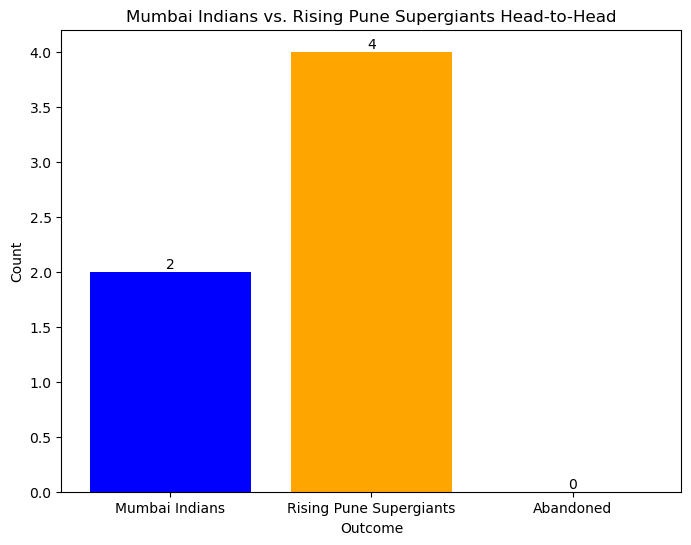

In [26]:
head_to_head(matches, 'Mumbai Indians','Rising Pune Supergiants')

### Batting Records

#### Most Runs

In [27]:
dfr = balls.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)[0:10]
result_df = dfr.reset_index().rename(columns={'index': 'Batsman', 'batsman_runs': 'Total Runs'})

In [28]:
result_df

,batter,Total Runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


#### Most runs for each Franchise

In [29]:
dfgd = balls.groupby(['batting_team', 'batter'])['batsman_runs'].sum()
highest_scores = dfgd.groupby('batting_team').max()
highest_scorers = dfgd.groupby('batting_team').idxmax()
results = pd.DataFrame({'highest_scorer': highest_scorers, 'Most Runs': highest_scores})
results['highest_scorer'] = results['highest_scorer'].apply(lambda x : x[1])
results = results.sort_values('Most Runs',ascending=False)

In [30]:
results

,highest_scorer,Most Runs
batting_team,,
Royal Challengers Bengaluru,V Kohli,8014
Mumbai Indians,RG Sharma,5460
Chennai Super Kings,SK Raina,4695
Sunrisers Hyderabad,DA Warner,4016
Rajasthan Royals,SV Samson,3742
Delhi Capitals,RR Pant,3297
Kolkata Knight Riders,G Gambhir,3035
Punjab Kings,KL Rahul,2554
Gujarat Titans,Shubman Gill,1799


#### Most Runs against a franchise

In [31]:
dfgd = balls.groupby(['bowling_team', 'batter'])['batsman_runs'].sum()
highest_scores = dfgd.groupby('bowling_team').max()
highest_scorers = dfgd.groupby('bowling_team').idxmax()
results = pd.DataFrame({'highest_scorer': highest_scorers, 'Most Runs': highest_scores})
results['highest_scorer'] = results['highest_scorer'].apply(lambda x : x[1])
results = results.sort_values('Most Runs',ascending=False)

In [32]:
results

,highest_scorer,Most Runs
bowling_team,,
Punjab Kings,DA Warner,1134
Kolkata Knight Riders,DA Warner,1093
Chennai Super Kings,S Dhawan,1057
Delhi Capitals,V Kohli,1057
Mumbai Indians,KL Rahul,954
Royal Challengers Bengaluru,MS Dhoni,864
Sunrisers Hyderabad,SV Samson,801
Rajasthan Royals,V Kohli,764
Pune Warriors,CH Gayle,383


#### Orange Cap Winners

In [33]:
dfgd = balls.groupby(['Year', 'batter'])['batsman_runs'].sum()
highest_scores = dfgd.groupby('Year').max()
highest_scorers = dfgd.groupby('Year').idxmax()
results = pd.DataFrame({'highest_scorer': highest_scorers, 'highest_score': highest_scores})
results['highest_scorer'] = results['highest_scorer'].apply(lambda x : x[1])
#results = results.sort_values('highest_score')

In [34]:
results

,highest_scorer,highest_score
Year,,
2008,SE Marsh,616
2009,ML Hayden,572
2010,SR Tendulkar,618
2011,CH Gayle,608
2012,CH Gayle,733
2013,MEK Hussey,733
2014,RV Uthappa,660
2015,DA Warner,562
2016,V Kohli,973


#### Highest Individual Innings Score

In [35]:
def calculate_highest_scorer(matches, balls):
    # Merge matches and balls dataframes on match_id
    merged_data = pd.merge(matches, balls, on='id', how='left')

    # Group by match_id and batter, then sum runs
    batsman_runs_by_match = merged_data.groupby(['id', 'batter'])['batsman_runs'].sum()

    # Get the highest scorer for each match
    highest_scorers = batsman_runs_by_match.groupby('id').idxmax()
    highest_scores = batsman_runs_by_match.groupby('id').max()

    # Combine highest scorers and their scores into a DataFrame
    results = pd.DataFrame({'highest_scorer': highest_scorers, 'highest_score': highest_scores})
    results['highest_scorer'] = results['highest_scorer'].apply(lambda x : x[1])
    results = results.sort_values('highest_score',ascending=False)[0:10]
    return results

# Assuming you have 'matches' and 'balls' DataFrames
highest_scorers_df = calculate_highest_scorer(matches, balls)

In [36]:
highest_scorers_df.reset_index()

,id,highest_scorer,highest_score
0,598027,CH Gayle,175
1,335982,BB McCullum,158
2,1304112,Q de Kock,140
3,829795,AB de Villiers,133
4,1216510,KL Rahul,132
5,980987,AB de Villiers,129
6,1370352,Shubman Gill,129
7,548372,CH Gayle,128
8,1136602,RR Pant,128
9,419137,M Vijay,127


#### Batting Strike Rate (Min 500 balls faced)

In [37]:
def calculate_batting_strikerate(balls):

    batsman_runs = balls.groupby('batter')['batsman_runs'].sum()
    batsman_balls = balls.groupby('batter')['ball'].count()
    batsman_balls = batsman_balls[batsman_balls > 400]
    batting_average = (batsman_runs[batsman_balls.index] / batsman_balls) * 100
    batting_average_df = batting_average.reset_index()
    batting_average_df.columns = ['Batsman', 'Strike Rate']
    batting_average_df = batting_average_df.sort_values('Strike Rate',ascending=False)[0:10]
    return batting_average_df

batting_strike_rate = calculate_batting_strikerate(balls)

In [38]:
batting_strike_rate.reset_index()

,index,Batsman,Strike Rate
0,136,TM Head,168.558952
1,6,AD Russell,164.224422
2,44,H Klaasen,161.990212
3,133,TH David,158.033573
4,121,SP Narine,155.894309
5,88,N Pooran,154.768154
6,71,LS Livingstone,154.187192
7,42,GJ Maxwell,150.488599
8,19,C Green,149.788136
9,23,CH Morris,149.636804


#### Balls Per Boundary

In [39]:
valid_balls = balls[(balls['extras_type'] != 'wides') & (balls['extras_type'] != 'penalty')]
boundary_data = balls[balls['batsman_runs'].isin([4, 6])].groupby('batter')['batsman_runs'].value_counts().unstack(fill_value=0)
balls_faced_data = valid_balls.groupby('batter')['ball'].count()
Balls_per_boundary = []
for batter in balls['batter'].unique():
    if batter in boundary_data.index and batter in balls_faced_data.index:
        fours = boundary_data.loc[batter, 4] if 4 in boundary_data.columns else 0
        sixes = boundary_data.loc[batter, 6] if 6 in boundary_data.columns else 0
        
        total_boundaries = fours + sixes
        balls_faced = balls_faced_data[batter]

        if balls_faced > 150 and total_boundaries > 0:
            balls_per_boundary = round(balls_faced / total_boundaries, 2)
            Balls_per_boundary.append((balls_per_boundary, batter))
Balls_per_boundary.sort()
Balls_per_boundary.insert(0, ('Balls per boundary *', 'Batsman'))

print(tabulate(Balls_per_boundary[:15], headers='firstrow', tablefmt="github"))
print('* Minimum 150 balls faced')

|   Balls per boundary * | Batsman        |
|------------------------|----------------|
|                   3.44 | PD Salt        |
|                   3.54 | SP Narine      |
|                   3.74 | AD Russell     |
|                   3.8  | MJ Lumb        |
|                   3.83 | TM Head        |
|                   3.99 | V Sehwag       |
|                   4.06 | YBK Jaiswal    |
|                   4.29 | PP Shaw        |
|                   4.33 | ST Jayasuriya  |
|                   4.34 | P Simran Singh |
|                   4.36 | CH Gayle       |
|                   4.38 | KR Mayers      |
|                   4.38 | LS Livingstone |
|                   4.38 | Rashid Khan    |
* Minimum 150 balls faced


#### Most Fours

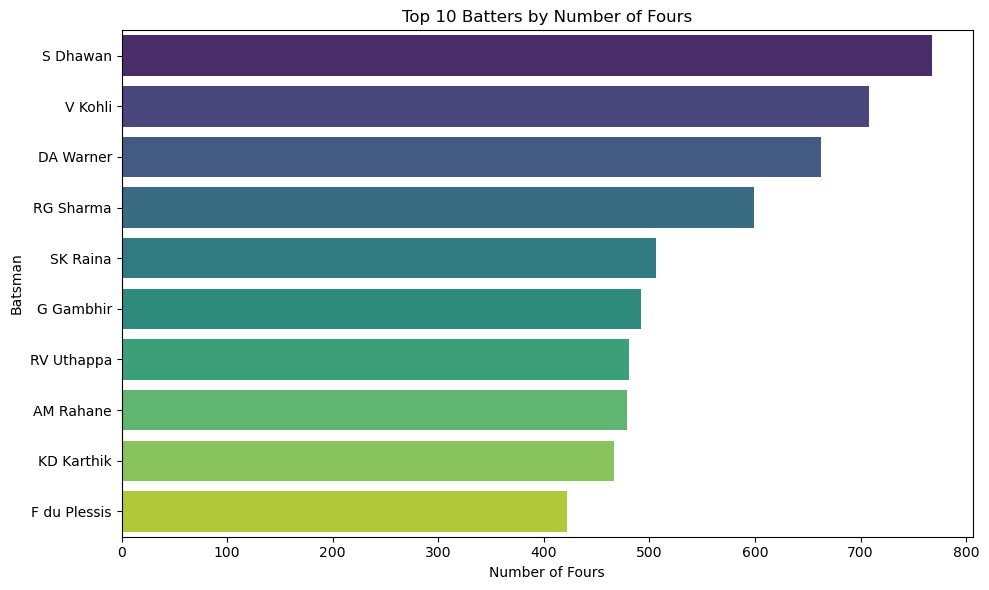

In [40]:
four_runs = balls[balls['batsman_runs'] == 4]['batsman_runs'].sum()
four_runs_by_batter = balls[balls['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count().sort_values(ascending=False)[0:10]
four_runs_df = pd.DataFrame({
    'Batsman': four_runs_by_batter.index,
    'Fours': four_runs_by_batter.values
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Fours', y='Batsman', data=four_runs_df, palette='viridis')
plt.xlabel('Number of Fours')
plt.ylabel('Batsman')
plt.title('Top 10 Batters by Number of Fours')
plt.tight_layout()
plt.show()

#### Most Sixes

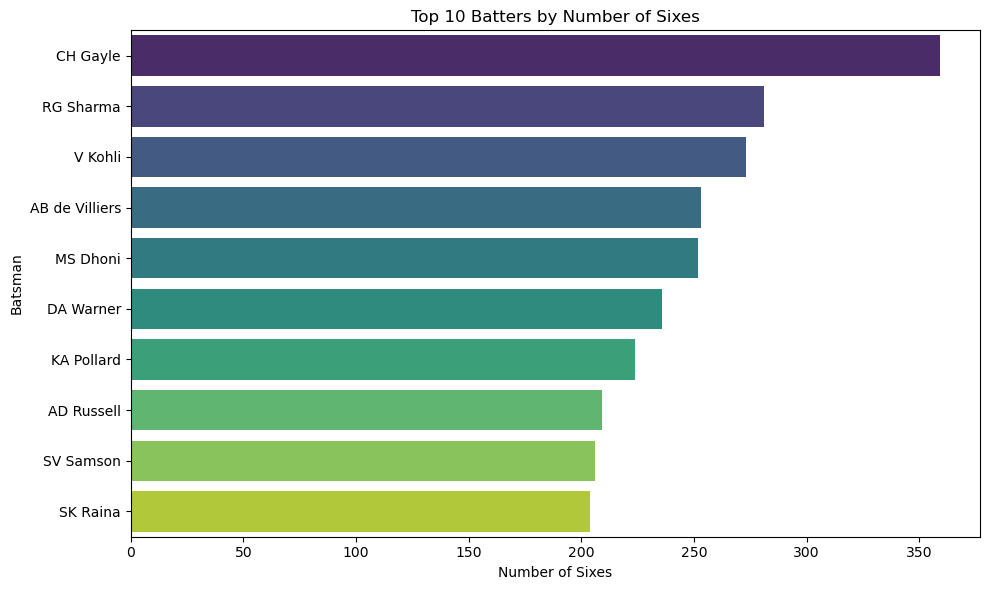

In [41]:
six_runs = balls[balls['batsman_runs'] == 6]['batsman_runs'].sum()
six_runs_by_batter = balls[balls['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count().sort_values(ascending=False)[0:10]
six_runs_df = pd.DataFrame({
    'Batsman': six_runs_by_batter.index,
    'Sixes': six_runs_by_batter.values
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Sixes', y='Batsman', data=six_runs_df, palette='viridis')
plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')
plt.title('Top 10 Batters by Number of Sixes')
plt.tight_layout()
plt.show()

#### Most Fours Season wise

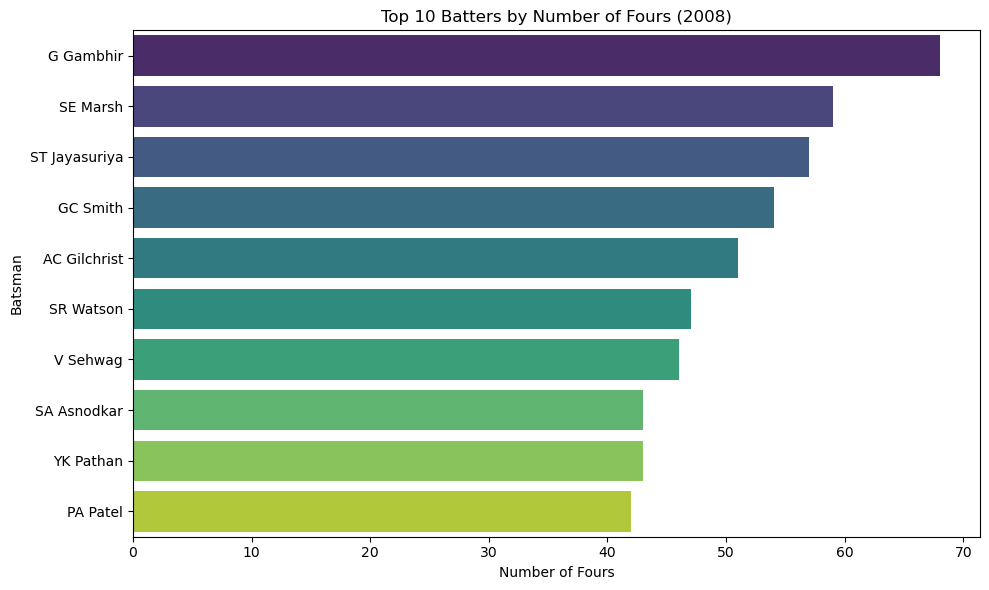

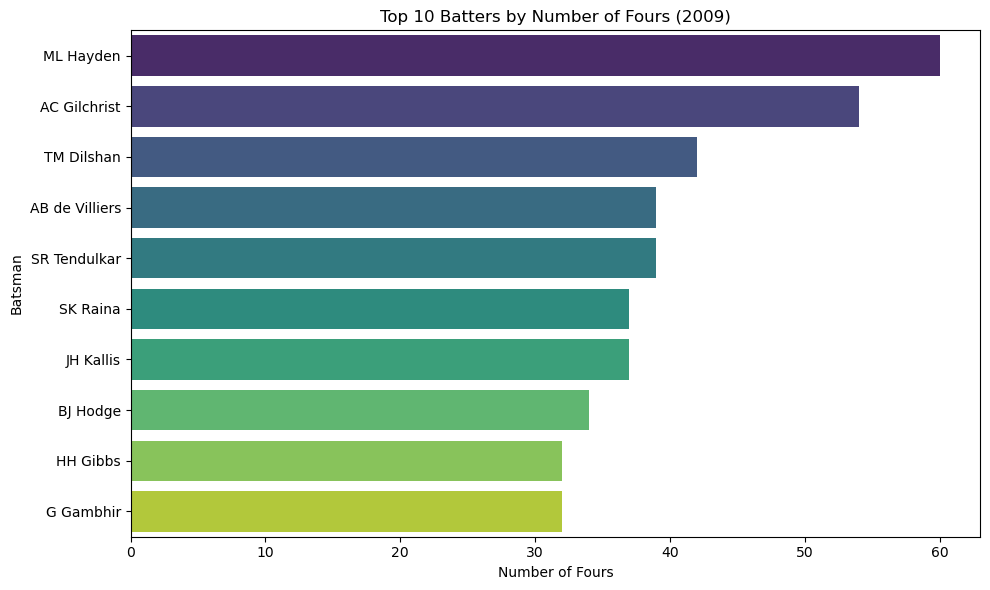

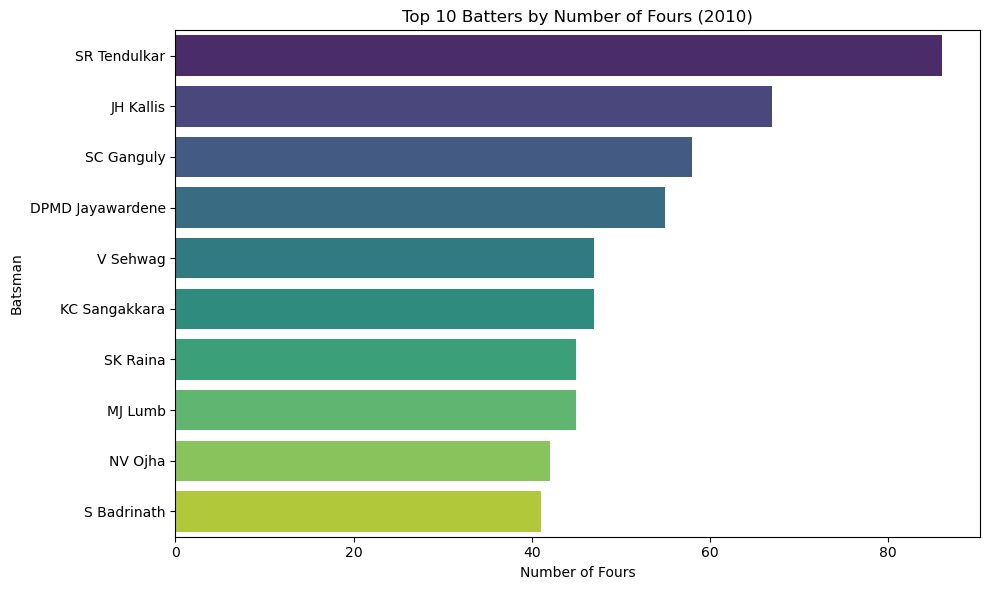

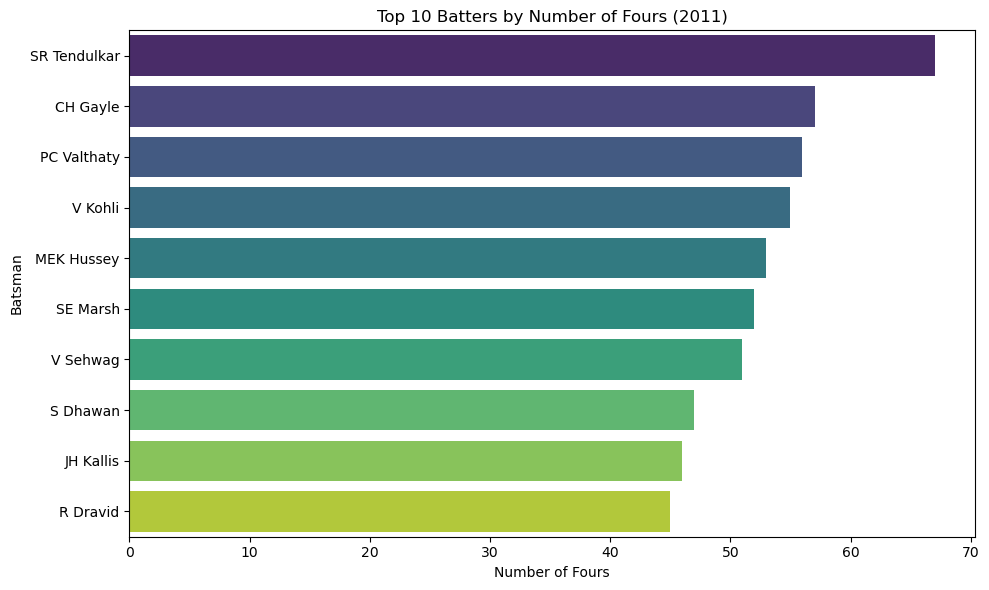

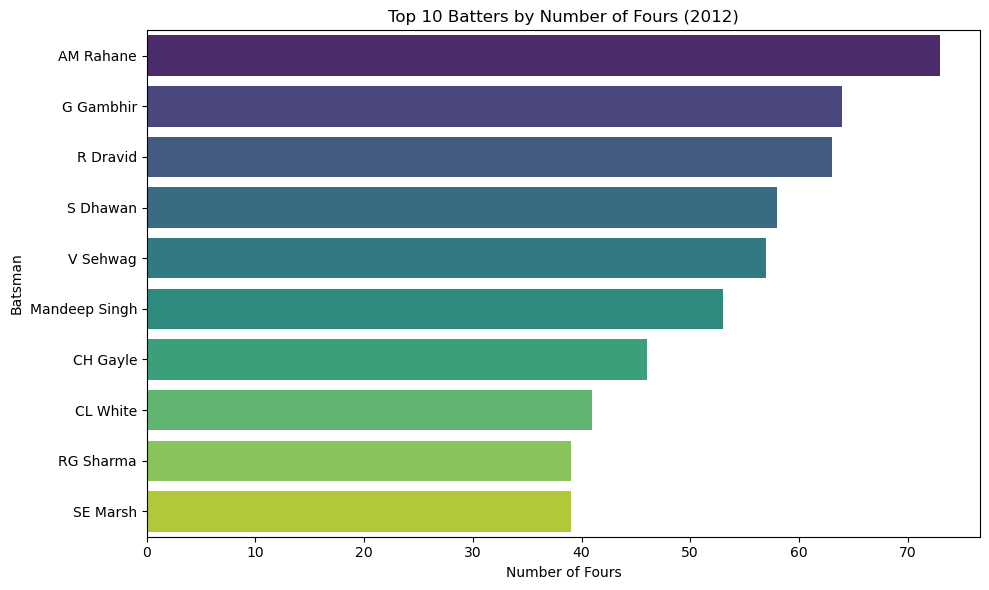

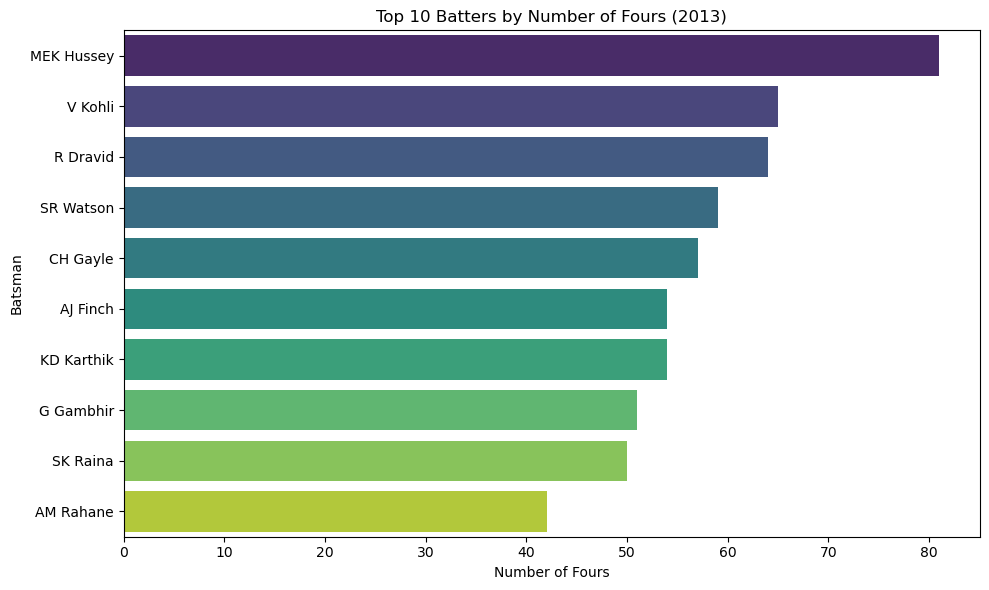

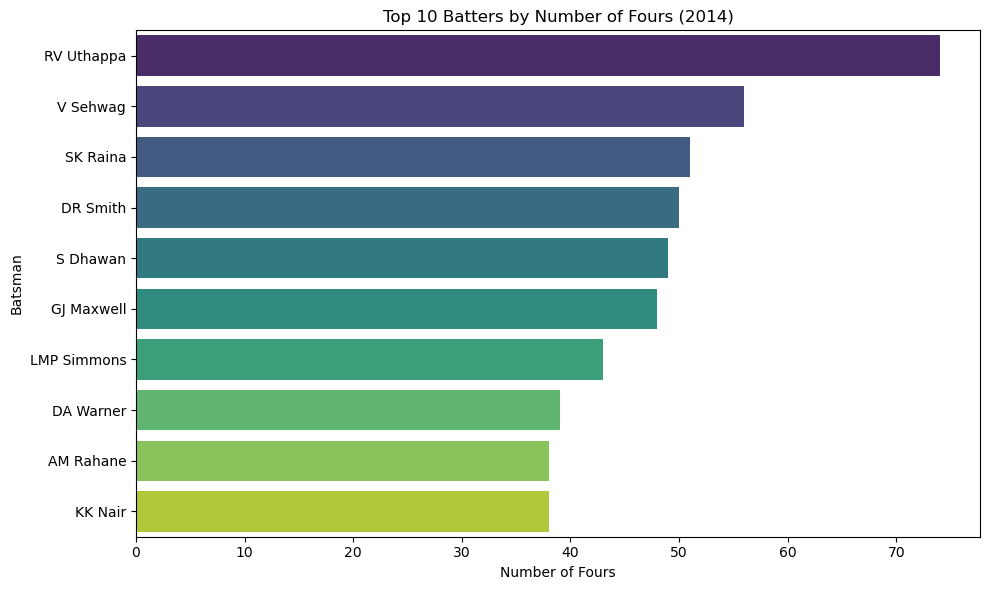

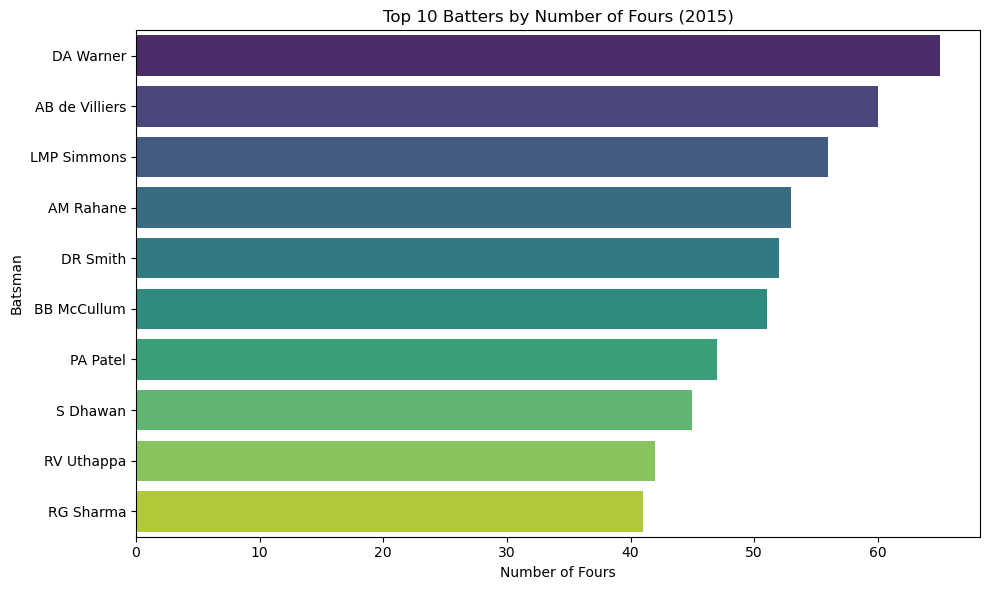

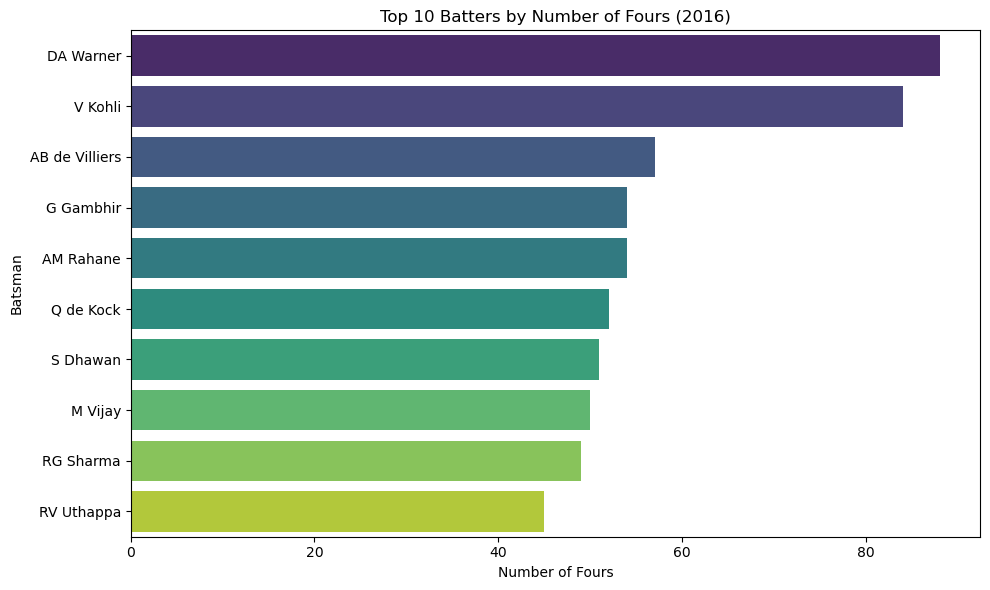

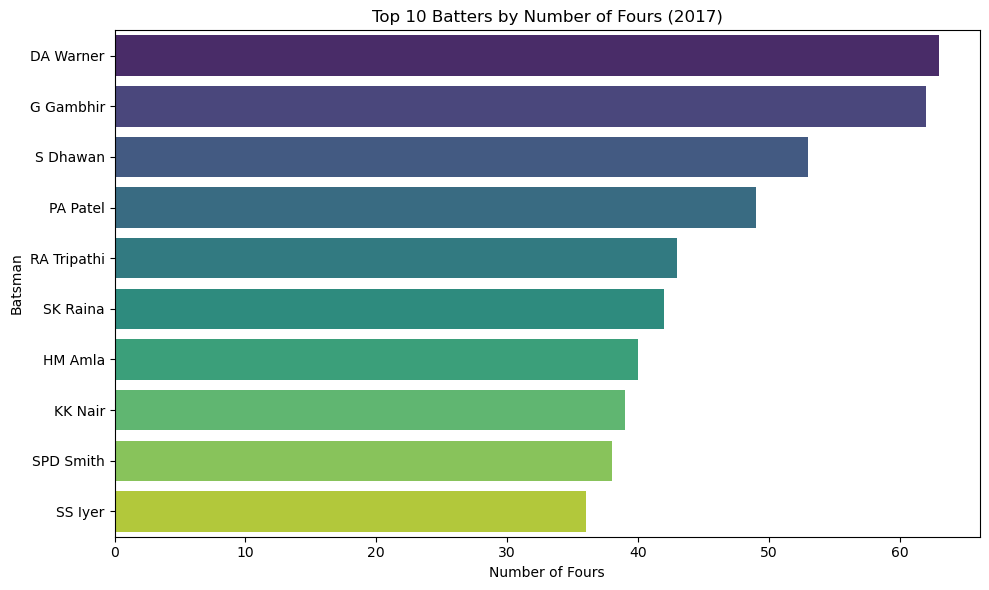

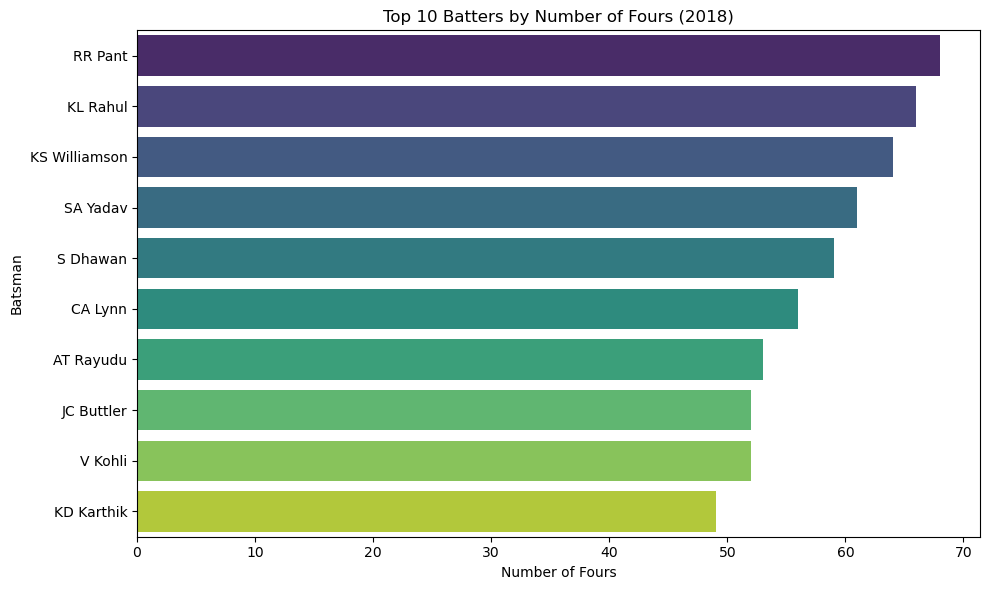

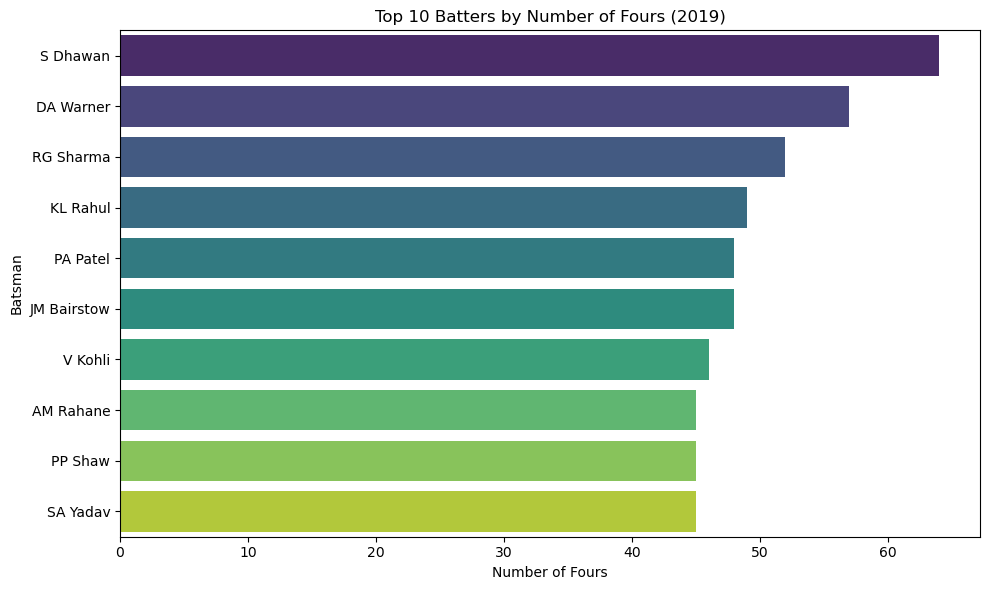

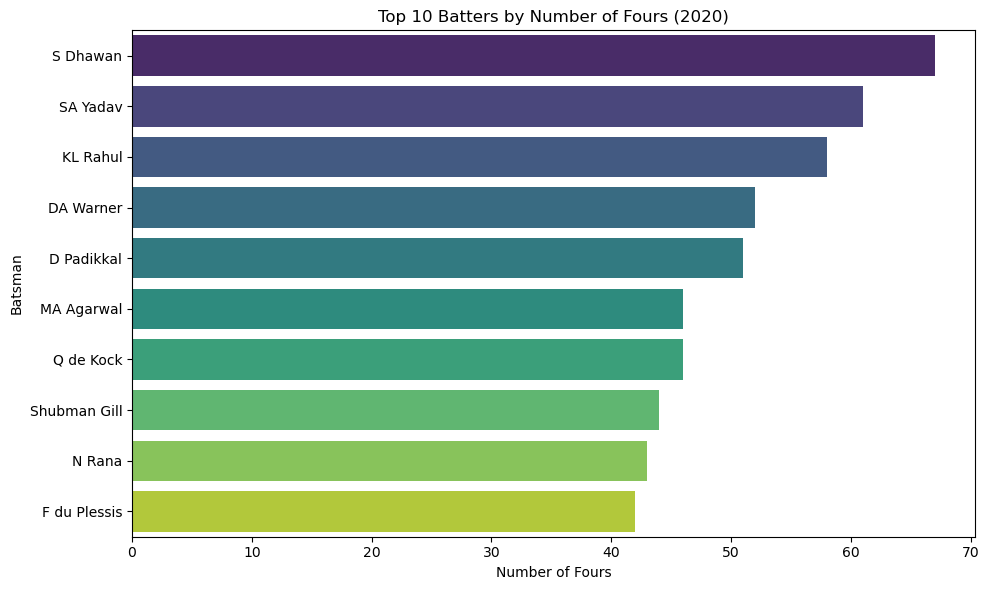

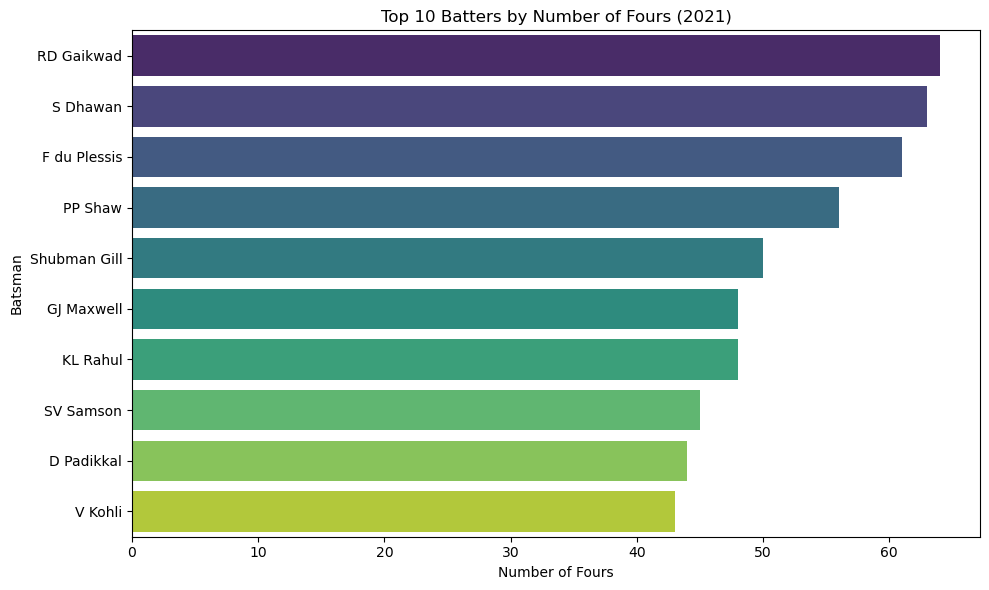

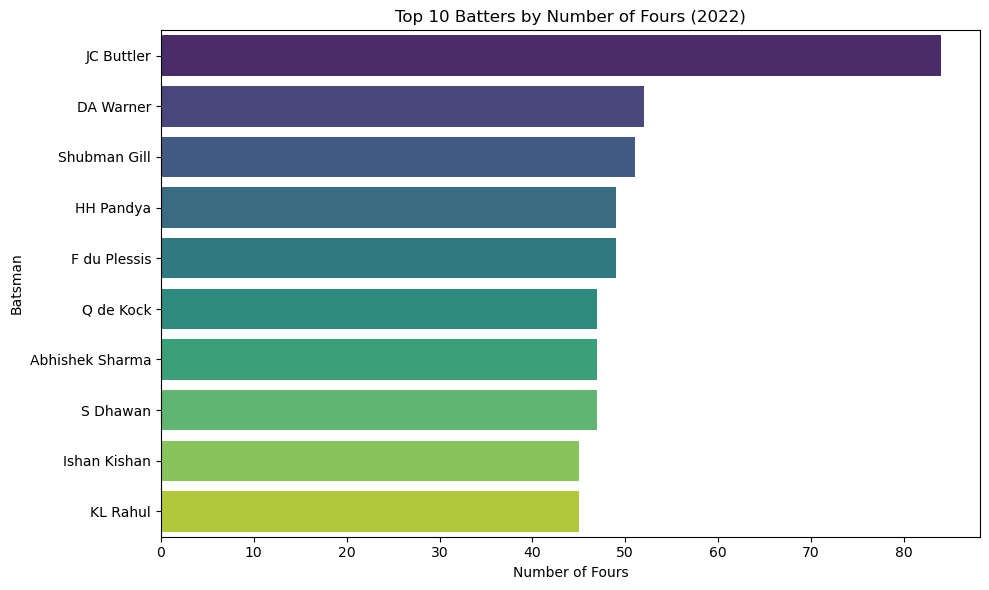

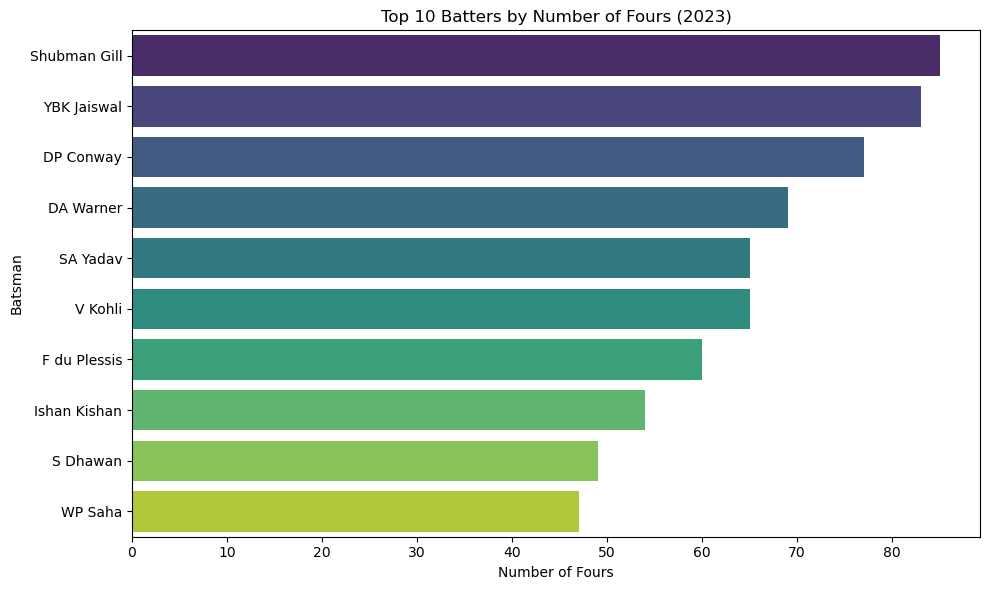

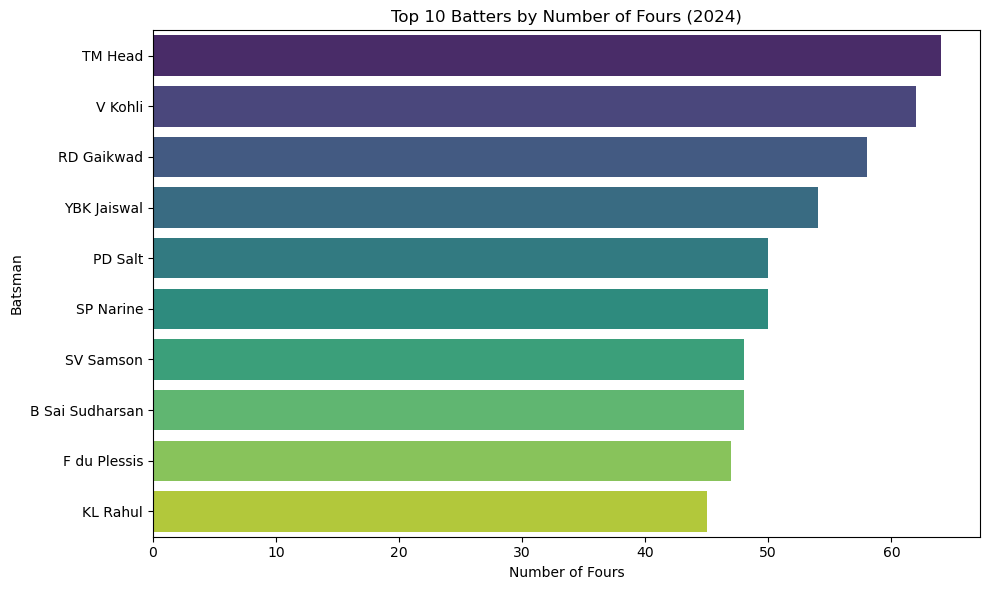

In [42]:
four_runs = balls[balls['batsman_runs'] == 4]['batsman_runs'].sum()
four_runs_by_batter = balls[balls['batsman_runs'] == 4].groupby(['Year','batter'])['batsman_runs'].count()

for year in balls['Year'].unique():
    four_runs_season = four_runs_by_batter.loc[year].sort_values(ascending=False).head(10)
    
    four_runs_df = pd.DataFrame({
        'Batsman': four_runs_season.index,
        'Fours': four_runs_season.values
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Fours', y='Batsman', data=four_runs_df, palette='viridis')
    plt.xlabel('Number of Fours')
    plt.ylabel('Batsman')
    plt.title(f'Top 10 Batters by Number of Fours ({year})')
    plt.tight_layout()
    plt.show()

#### Most Sixes season wise

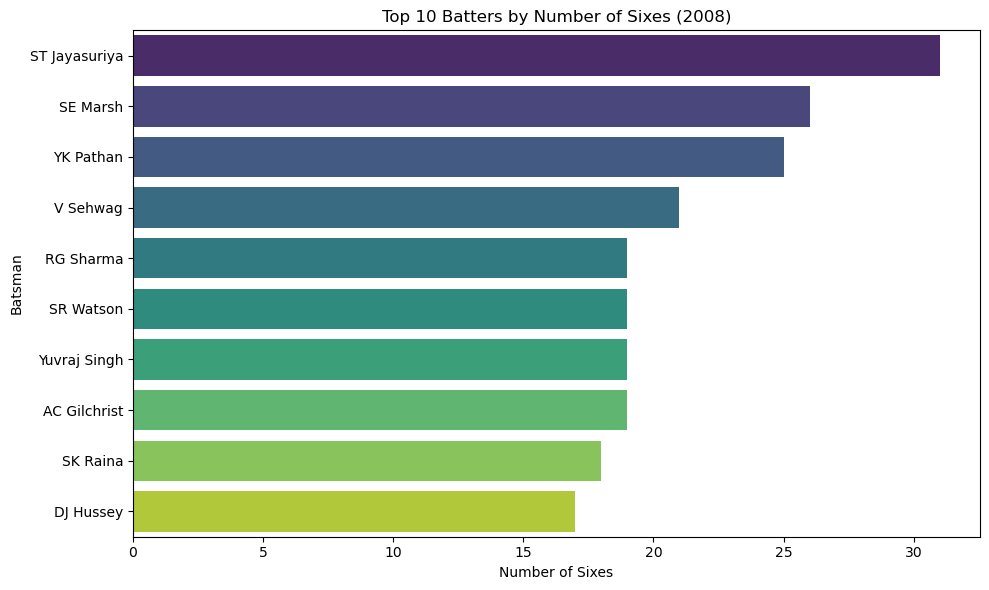

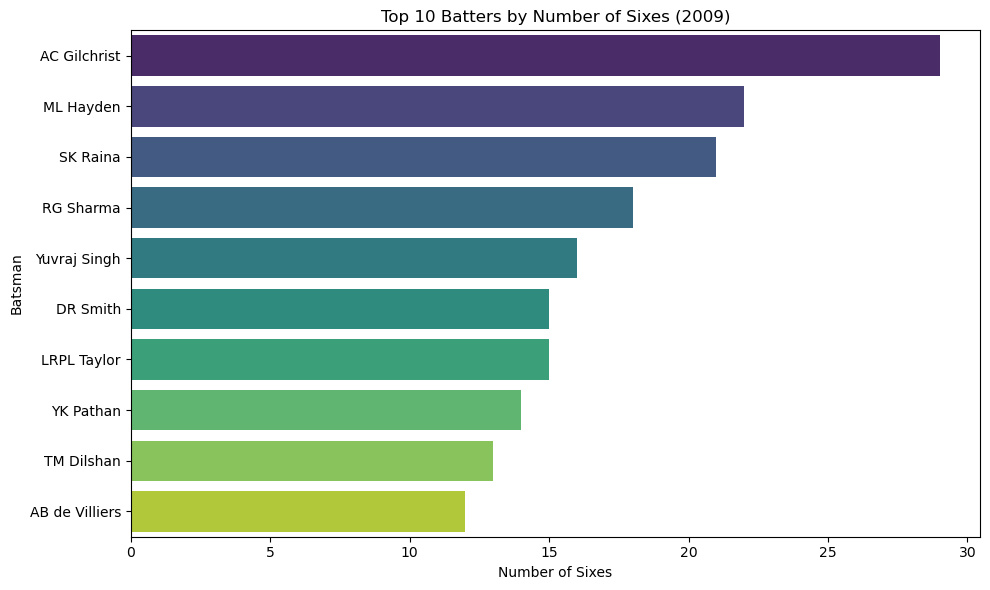

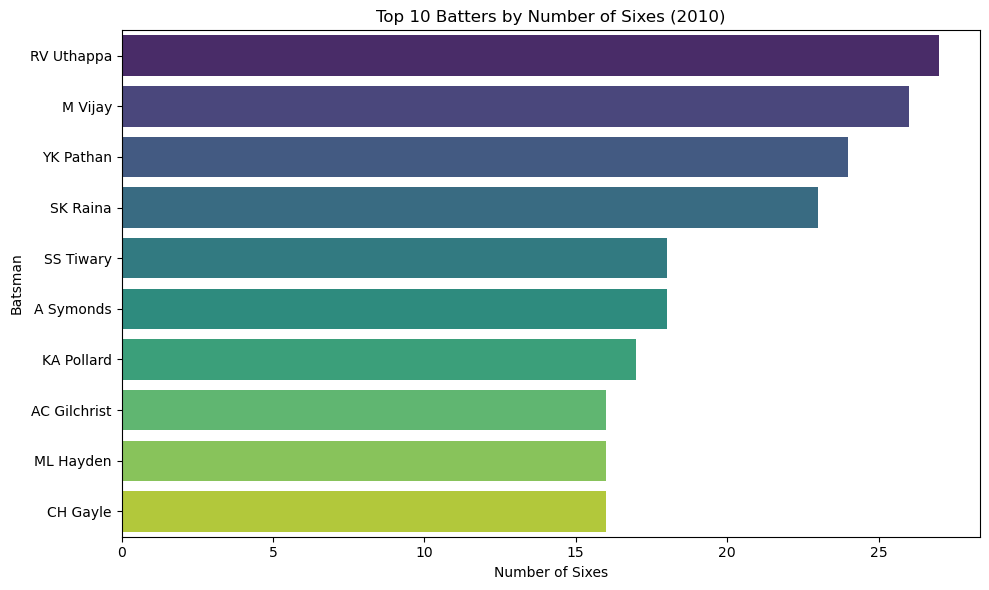

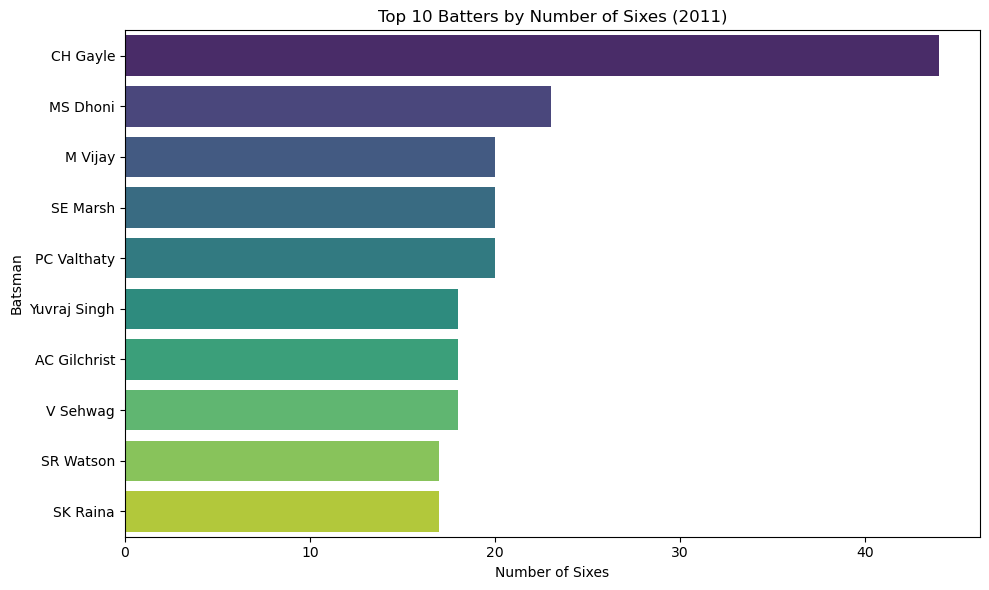

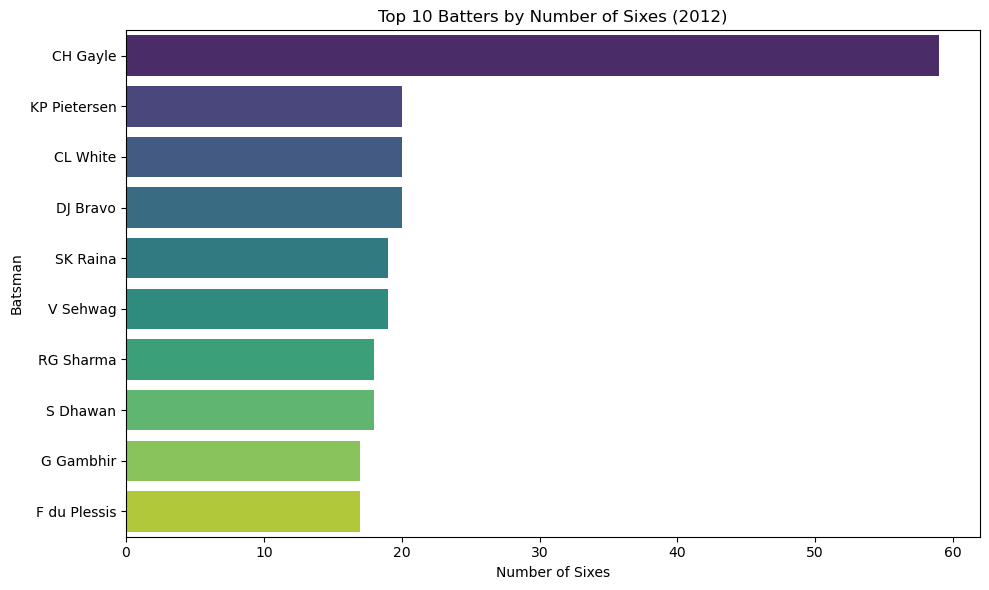

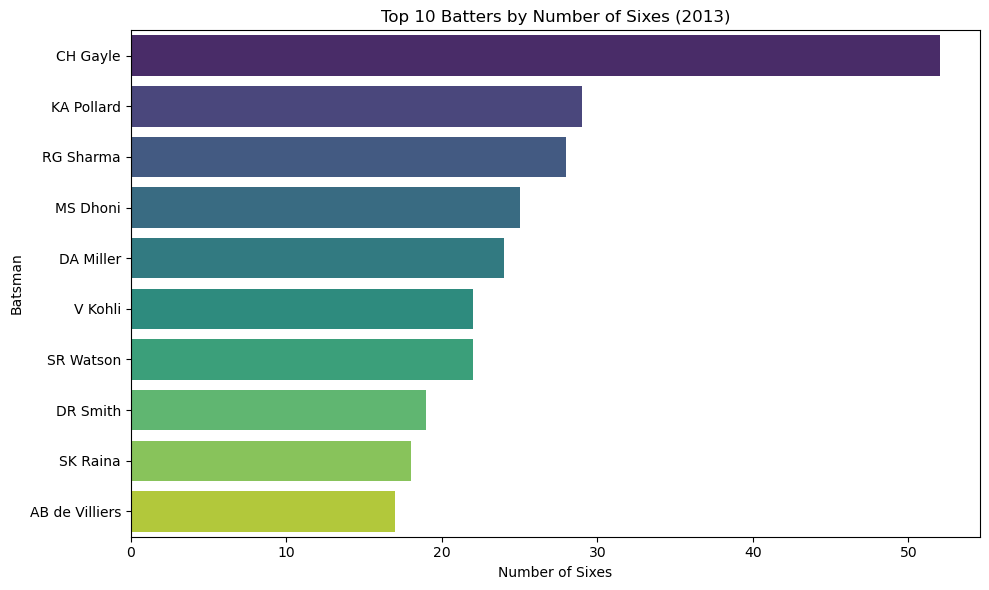

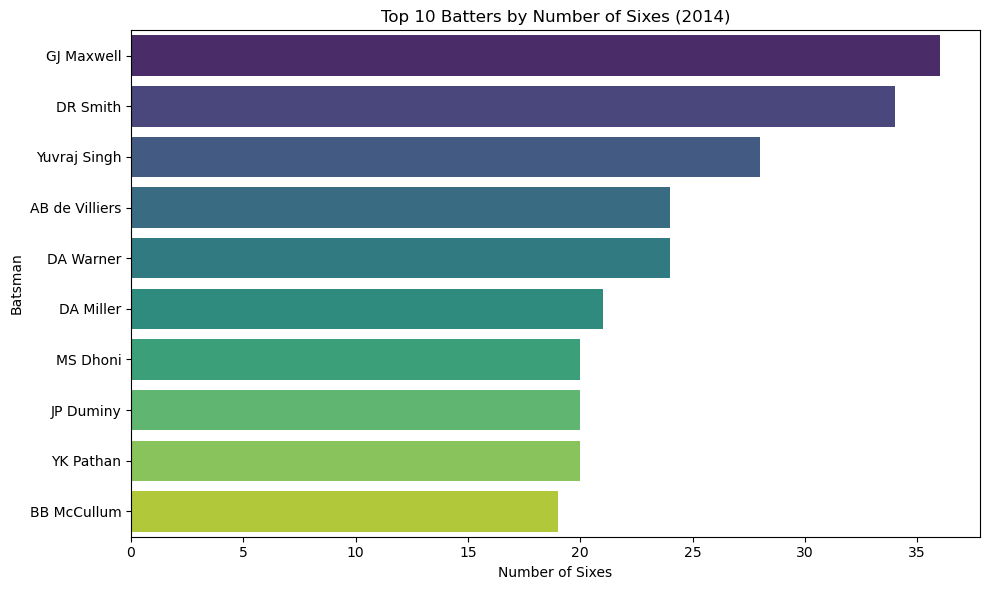

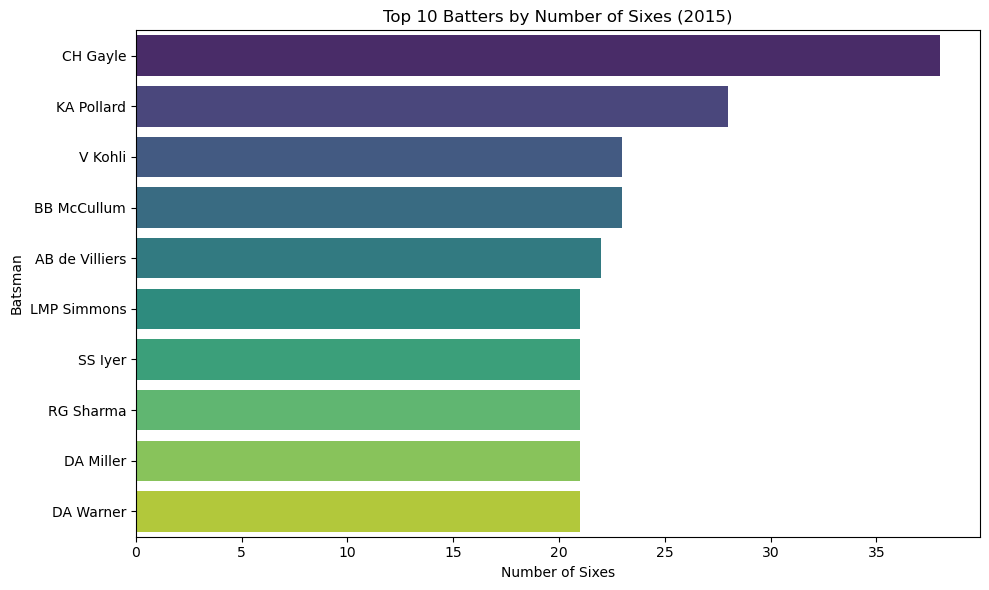

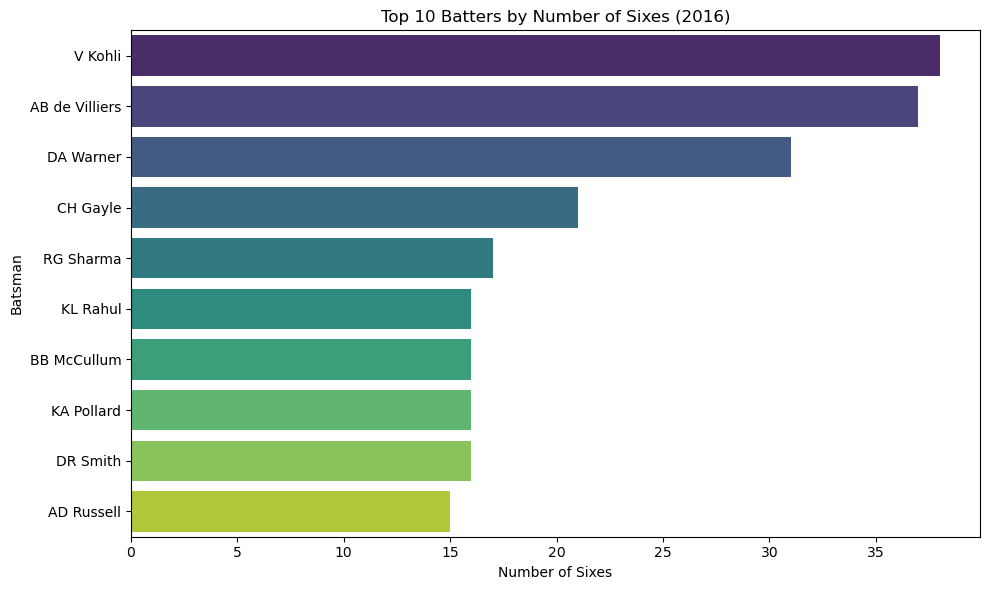

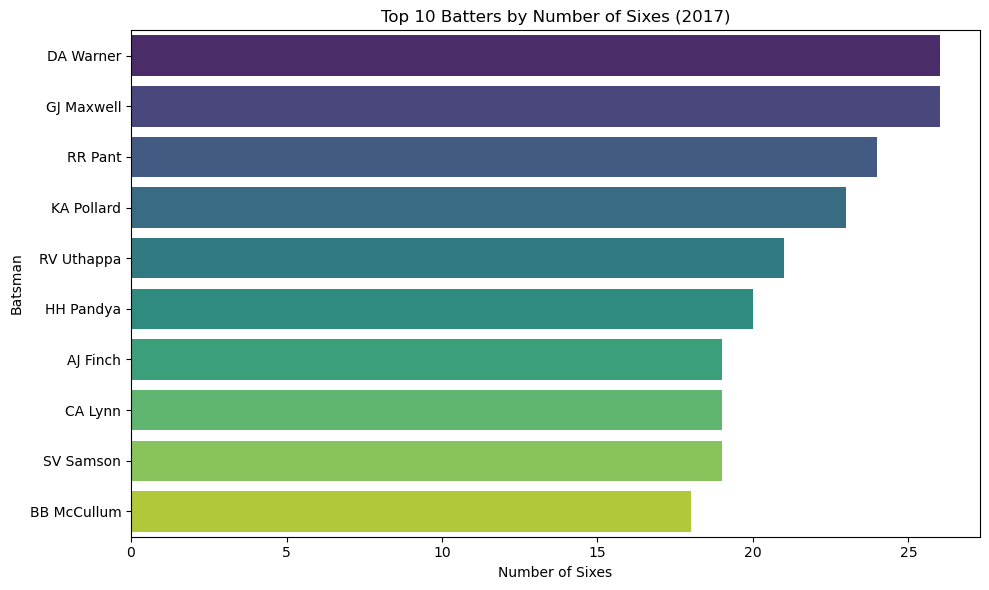

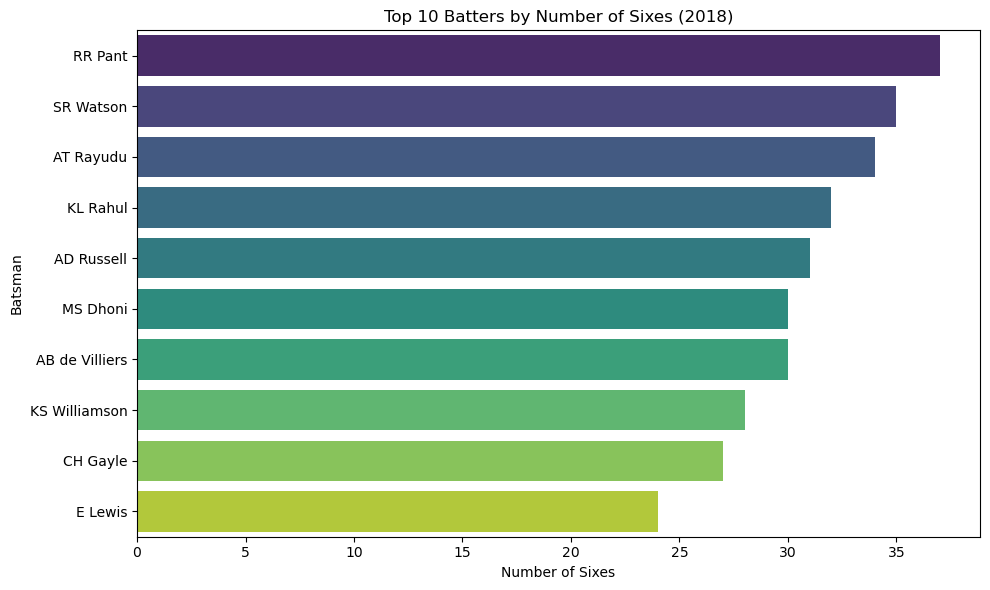

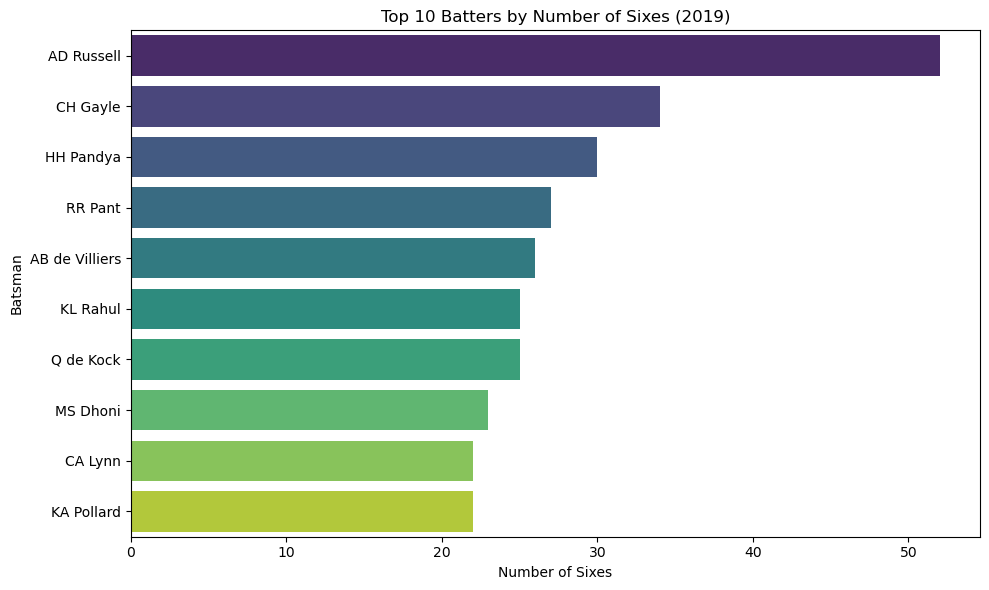

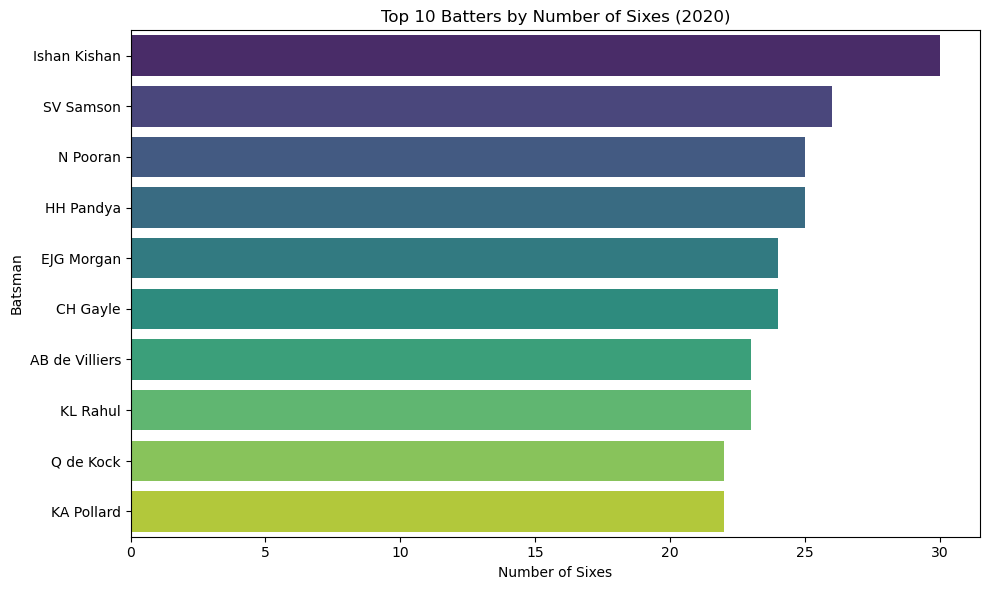

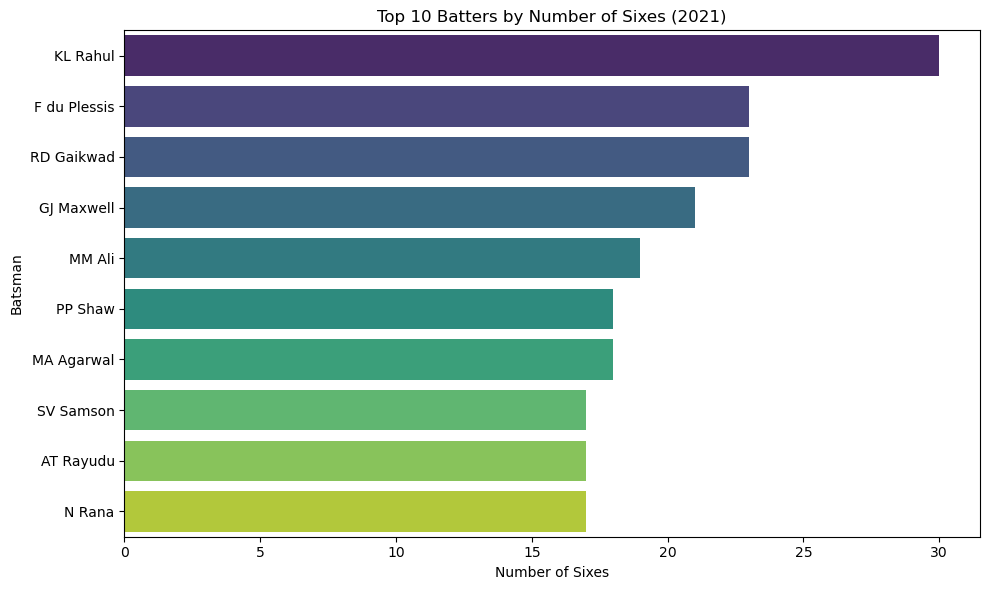

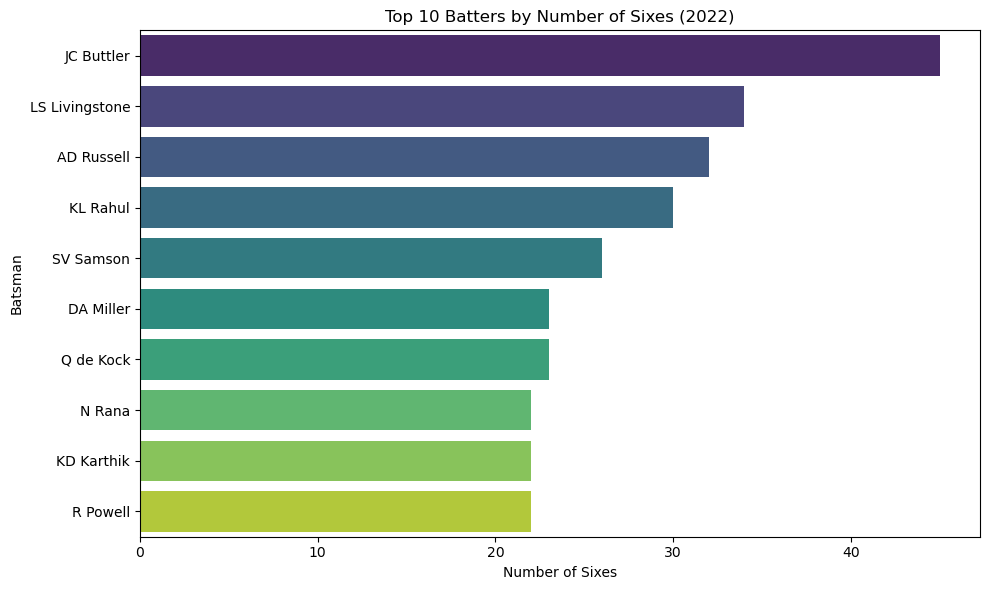

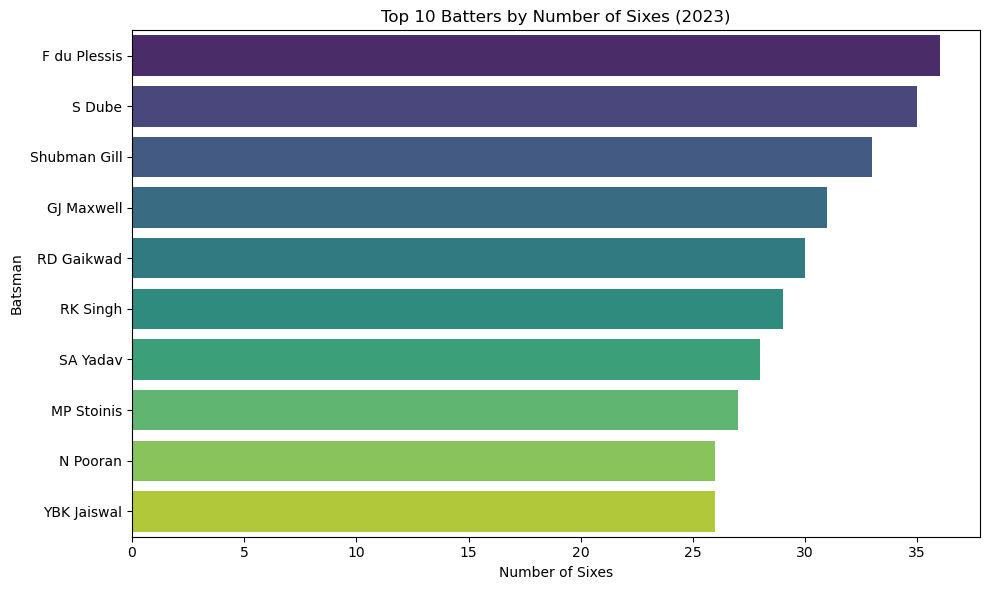

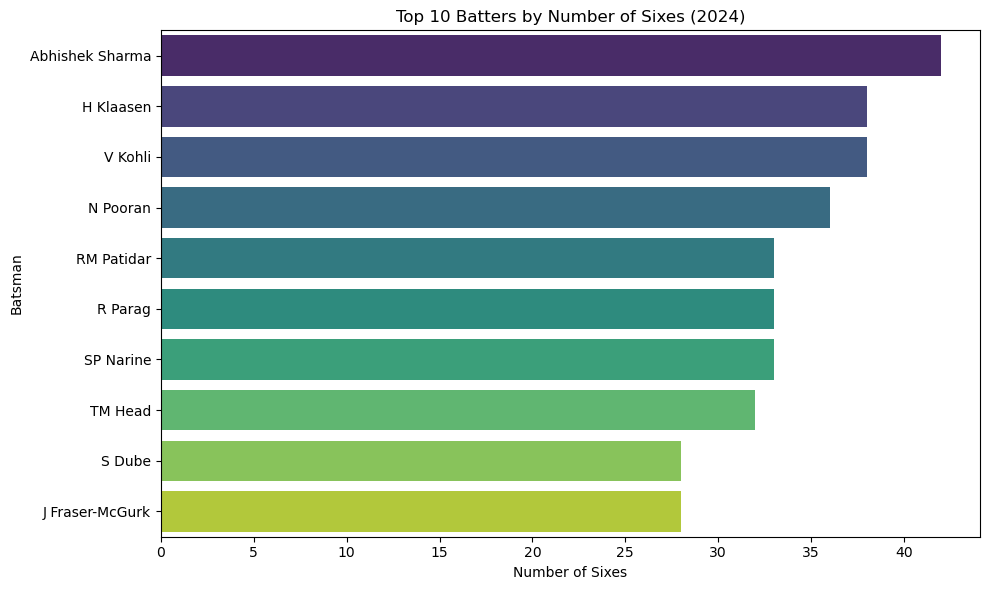

In [43]:
six_runs = balls[balls['batsman_runs'] == 6]['batsman_runs'].sum()
six_runs_by_batter = balls[balls['batsman_runs'] == 6].groupby(['Year','batter'])['batsman_runs'].count()

for year in balls['Year'].unique():
    six_runs_season = six_runs_by_batter.loc[year].sort_values(ascending=False).head(10)
    
    six_runs_df = pd.DataFrame({
        'Batsman': six_runs_season.index,
        'Sixes': six_runs_season.values
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Sixes', y='Batsman', data=six_runs_df, palette='viridis')
    plt.xlabel('Number of Sixes')
    plt.ylabel('Batsman')
    plt.title(f'Top 10 Batters by Number of Sixes ({year})')
    plt.tight_layout()
    plt.show()

#### Batter-to-Batter Runs comparison (Yearly Basis)

In [44]:
def batter_to_batter_comparison(df,batter1,batter2):
    df = df.groupby('Year')
    Batter1 = []
    Batter2 = []
    YEAR = []
    for i in list(balls['Year'].unique()):
        df1 = df.get_group(i)[df.get_group(i)['batter']==batter1]
        df2 = df.get_group(i)[df.get_group(i)['batter']==batter2]
        
        Batter1.append(int(df1['batsman_runs'].sum()))
        Batter2.append(int(df2['batsman_runs'].sum()))
        YEAR.append(int(i))
    index = np.arange(17)
    bar_width = 0.22
    fig, ax = plt.subplots(figsize=(15,15))
    Batter_1 = ax.bar(index, Batter1,bar_width, label=batter1)
    Batter_2 = ax.bar(index+bar_width, Batter2,bar_width, label=batter2)
    for BAR in Batter_1+Batter_2:
        plt.text(BAR.get_x() + BAR.get_width() / 2.0, BAR.get_height(), f'{BAR.get_height():.0f}', ha='center', va='bottom')
    ax.set_xlabel('Year')
    ax.set_ylabel('Runs Scored')
    ax.set_title('Runs comparison')
    ax.set_xticks(index+bar_width)
    ax.set_xticklabels(YEAR)
    ax.legend()
    plt.show()

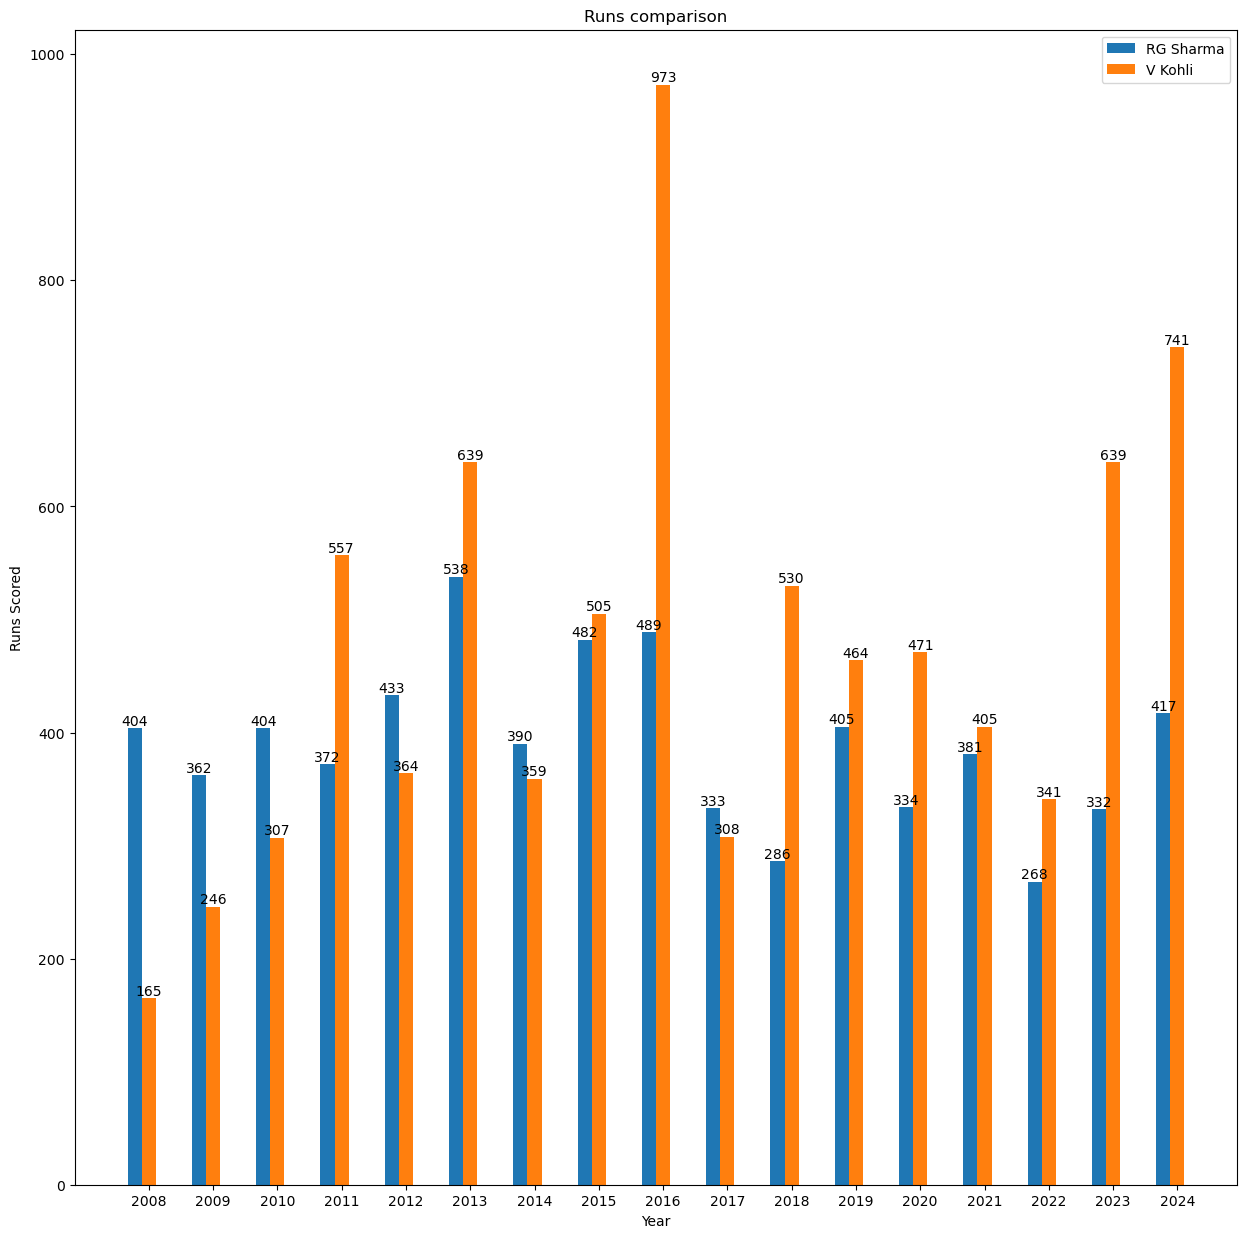

In [45]:
batter_to_batter_comparison(balls,'RG Sharma','V Kohli')

#### Most 50s and 100s

In [46]:
dffa = balls.groupby(['batter','id'])['batsman_runs'].sum()
fifties = []
hundreds = []
for batter in balls['batter'].unique():
    fifties.append([batter,len([i for i in list(dffa[batter].values) if 100>i>49])])
    hundreds.append([batter,len([i for i in list(dffa[batter].values) if i>99])])

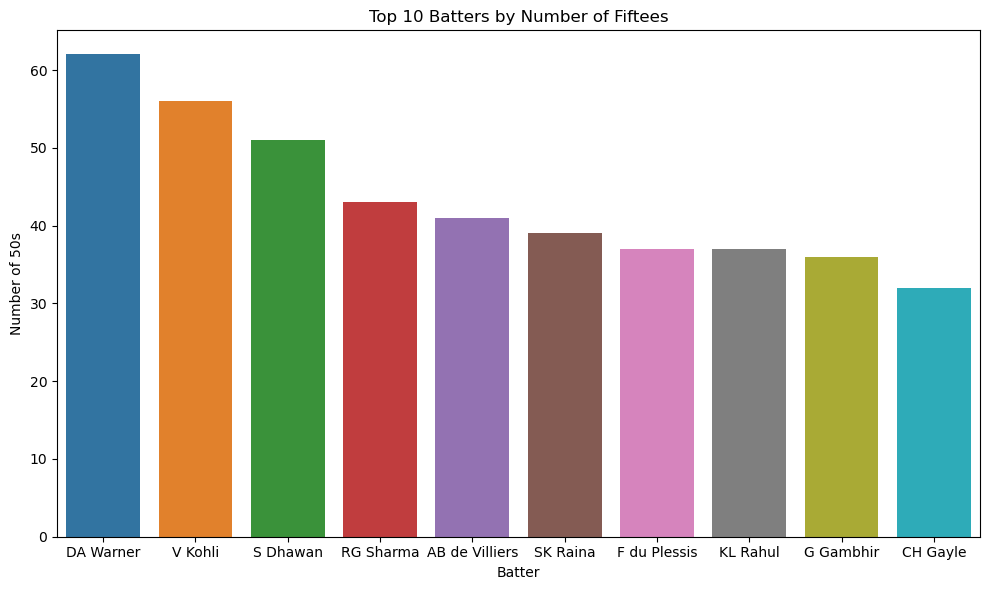

In [47]:
fif = pd.DataFrame(fifties,columns=['Batter','50s']).sort_values('50s',ascending=False)[0:10]
plt.figure(figsize=(10, 6))
sns.barplot(x='Batter', y='50s', data=fif)
plt.xlabel('Batter')
plt.ylabel('Number of 50s')
plt.title('Top 10 Batters by Number of Fiftees')
plt.tight_layout()
plt.show()

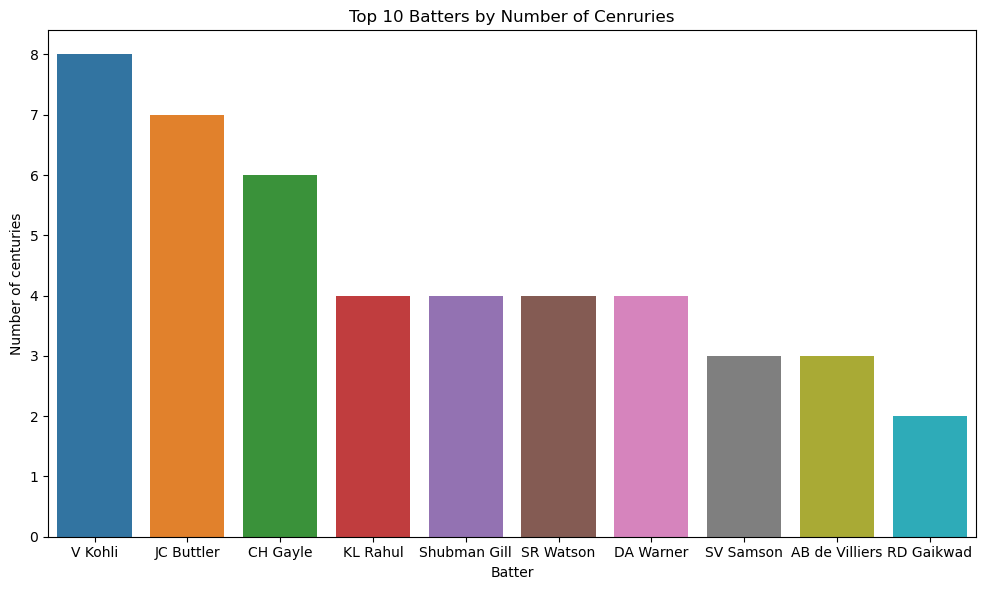

In [48]:
hun = pd.DataFrame(hundreds,columns=['Batter','Centuries']).sort_values('Centuries',ascending=False)[0:10]
plt.figure(figsize=(10, 6))
sns.barplot(x='Batter', y='Centuries', data=hun)
plt.xlabel('Batter')
plt.ylabel('Number of centuries')
plt.title('Top 10 Batters by Number of Cenruries')
plt.tight_layout()
plt.show()

#### Runrate in powerplay and death overs(17-20) for all participating teams each year

In [49]:
def runrate(df1):
    df1_y = df1.groupby(df1.Year)
    Run_rate_powerplay_every_year = []
    for i in df1['Year'].unique():
        Run_rate = []
        df2 = pd.DataFrame()
        for j in df1['batting_team'].unique():
            df2 = df1_y.get_group(i)[df1_y.get_group(i)['batting_team']==j]  
            x = int(df2[(df2['extras_type']!='wides') & (df2['extras_type']!='noballs') & (df2['extras_type']!='penalty') & (df2['over']<7)]['ball'].count())
            y = int(df2[(df2['extras_type']!='wides') & (df2['extras_type']!='noballs') & (df2['extras_type']!='penalty') & (df2['over']>16)]['ball'].count())
            if x!=0 and y!=0:
                Run_rate.append((round(6*(int(df2[(df2['over']<7)]['batsman_runs'].sum())+int(df2[(df2['over']<7)]['extra_runs'].sum()))/x,2),\
                                 round(6*(int(df2[(df2['over']>16)]['batsman_runs'].sum())+int(df2[(df2['over']>16)]['extra_runs'].sum()))/y,2),j,int(i)))
        Run_rate_powerplay_every_year.append(Run_rate)
    for i in Run_rate_powerplay_every_year:
        i.insert(0,('Run rate (Powerplay)','Run rate (death overs (17-20))','Team','Year'))
        print(tabulate(i,headers='firstrow',tablefmt='pretty'))

In [50]:
runrate(balls)

+----------------------+--------------------------------+-----------------------------+------+
| Run rate (Powerplay) | Run rate (death overs (17-20)) |            Team             | Year |
+----------------------+--------------------------------+-----------------------------+------+
|         6.64         |             11.68              |    Kolkata Knight Riders    | 2008 |
|         6.27         |              9.38              | Royal Challengers Bengaluru | 2008 |
|         7.57         |             11.41              |     Chennai Super Kings     | 2008 |
|         8.43         |             10.78              |        Punjab Kings         | 2008 |
|         7.88         |              9.4               |      Rajasthan Royals       | 2008 |
|         8.58         |             10.11              |       Delhi Capitals        | 2008 |
|         8.01         |              10.4              |       Mumbai Indians        | 2008 |
|         7.53         |             10.57        

#### Orange and Purple Cap Season Wise

In [51]:
def orange_and_purple_cap(data,year):
    O = []
    P = []
    data_y = data.groupby(data.Year)
    for j in data_y.get_group(year)['batter'].unique():
        Data_O = data_y.get_group(year)[data_y.get_group(year)['batter']==j]
        O.append((int(Data_O['batsman_runs'].sum()),j))
    for j in data_y.get_group(year)['bowler'].unique():
        Data_P = data_y.get_group(year)[data_y.get_group(year)['bowler']==j]
        P.append((int(Data_P[(Data_P['bowler']==j) & (Data_P['dismissal_kind']!='run out') & (Data_P['dismissal_kind']!='retired hurt') & (Data_P['dismissal_kind']!='obstructing the field')]\
        ['is_wicket'].sum()),j))
    O.sort()
    P.sort()
    return 'Orange cap: '+str(O[-1][-1]),'\nPurple cap: '+str(P[-1][-1])

data = balls
year = input('Year : ')
print(orange_and_purple_cap(data,year)[0],orange_and_purple_cap(data,year)[1])

Year :  2016


Orange cap: V Kohli 
Purple cap: B Kumar


### Bowling Records

#### Most Wickets

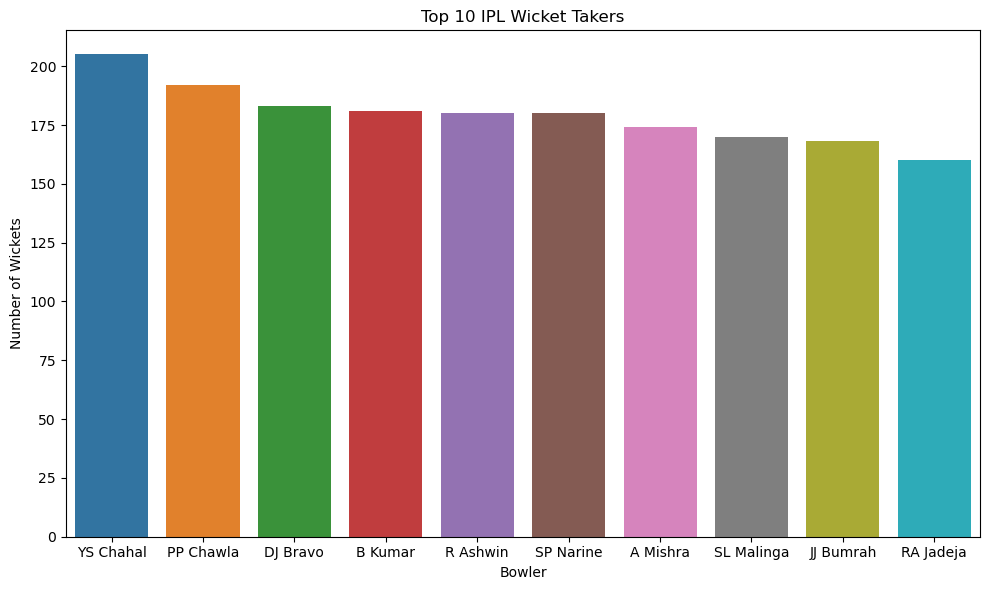

In [52]:
valid_balls = balls[(balls['dismissal_kind']!='run out') & (balls['dismissal_kind']!='retired hurt') & (balls['dismissal_kind']!='retired out') & (balls['dismissal_kind']!='obstructing the field')]
ball = valid_balls.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)[0:10]
ball_df = pd.DataFrame({'Bowler':ball.index,'Total Wickets':ball.values})
plt.figure(figsize=(10, 6))
sns.barplot(x='Bowler', y='Total Wickets', data=ball_df)
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 IPL Wicket Takers')
plt.tight_layout()
plt.show()

#### Most Wickets for each Franchise

In [53]:
dfgd = valid_balls.groupby(['bowling_team', 'bowler'])['is_wicket'].sum()
highest_scores = dfgd.groupby('bowling_team').max()
highest_scorers = dfgd.groupby('bowling_team').idxmax()
results = pd.DataFrame({'Bowlers': highest_scorers, 'Most Wickets': highest_scores})
results['Bowlers'] = results['Bowlers'].apply(lambda x : x[1])
#results = results.sort_values('Most Wickets',ascending=False)

In [54]:
results

,Bowlers,Most Wickets
bowling_team,,
Chennai Super Kings,DJ Bravo,140
Deccan Chargers,PP Ojha,60
Delhi Capitals,A Mishra,106
Gujarat Lions,DS Kulkarni,21
Gujarat Titans,Rashid Khan,56
Kochi Tuskers Kerala,RP Singh,13
Kolkata Knight Riders,SP Narine,180
Lucknow Super Giants,Ravi Bishnoi,39
Mumbai Indians,SL Malinga,170


#### Most Wickets against each Franchise

In [55]:
dfgd = valid_balls.groupby(['batting_team', 'bowler'])['is_wicket'].sum()
highest_scores = dfgd.groupby('batting_team').max()
highest_scorers = dfgd.groupby('batting_team').idxmax()
results = pd.DataFrame({'Bowlers': highest_scorers, 'Most Wickets': highest_scores})
results['Bowlers'] = results['Bowlers'].apply(lambda x : x[1])
#results = results.sort_values('Most Wickets',ascending=False)

In [56]:
results

,Bowlers,Most Wickets
batting_team,,
Chennai Super Kings,SL Malinga,31
Deccan Chargers,SL Malinga,19
Delhi Capitals,PP Chawla,27
Gujarat Lions,B Kumar,12
Gujarat Titans,K Rabada,9
Kochi Tuskers Kerala,I Sharma,5
Kolkata Knight Riders,B Kumar,32
Lucknow Super Giants,JR Hazlewood,9
Mumbai Indians,DJ Bravo,33


In [57]:
dfgd = valid_balls.groupby(['Year', 'bowler'])['is_wicket'].sum()
highest_wickets = dfgd.groupby('Year').max()
highest_wickettaker = dfgd.groupby('Year').idxmax()
results = pd.DataFrame({'Bowler': highest_wickettaker, 'Wickets': highest_wickets})
results['Bowler'] = results['Bowler'].apply(lambda x : x[1])
#results = results.sort_values('highest_score')

In [58]:
results

,Bowler,Wickets
Year,,
2008,Sohail Tanvir,22
2009,RP Singh,23
2010,PP Ojha,21
2011,SL Malinga,28
2012,M Morkel,25
2013,DJ Bravo,32
2014,MM Sharma,23
2015,DJ Bravo,26
2016,B Kumar,23


#### Balls Per wicket

In [59]:
dfgd = valid_balls.groupby(['bowler'])['is_wicket'].sum()
tb = balls[(balls['extras_type']!='wides') & (balls['extras_type']!='noballs') & (balls['extras_type']!='penalty')]
tb = tb.groupby(['bowler'])['ball'].count()
tb = [[tb[bowler]/dfgd[bowler],bowler] for bowler in balls['bowler'].unique() if tb[bowler]>240 ]
BPW = pd.DataFrame(tb,columns=['Balls per wicket','Bowler'])

In [60]:
BPW.sort_values('Balls per wicket')[0:10].reset_index(drop=True)

,Balls per wicket,Bowler
0,11.227273,Sohail Tanvir
1,12.960000,L Ngidi
2,13.264706,M Pathirana
3,13.789474,Akash Madhwal
4,14.448276,A Zampa
5,14.555556,A Ashish Reddy
6,14.666667,CR Woakes
7,14.756522,AD Russell
8,15.135135,MR Marsh
9,15.241667,K Rabada


#### Best Bowling Figures 

In [61]:
bm = valid_balls.groupby(['id','bowler'])[['batsman_runs','is_wicket']].sum().sort_values(by=['is_wicket', 'batsman_runs'], ascending=[False, True])[0:10]

In [62]:
bm.columns = ['Total Conceeded Runs','Total wickets taken']

In [63]:
bm.reset_index()

,id,bowler,Total Conceeded Runs,Total wickets taken
0,1178394,AS Joseph,10,6
1,336005,Sohail Tanvir,14,6
2,980979,A Zampa,19,6
3,392182,A Kumble,5,5
4,1370351,Akash Madhwal,5,5
5,1304102,JJ Bumrah,10,5
6,1370352,MM Sharma,10,5
7,501229,I Sharma,11,5
8,501201,SL Malinga,12,5
9,1359477,MA Wood,12,5


In [64]:
bm.droplevel(0)

,Total Conceeded Runs,Total wickets taken
bowler,,
AS Joseph,10,6
Sohail Tanvir,14,6
A Zampa,19,6
A Kumble,5,5
Akash Madhwal,5,5
JJ Bumrah,10,5
MM Sharma,10,5
I Sharma,11,5
SL Malinga,12,5


#### Best Economy Rates 

In [65]:
valid_balls = balls[(balls['extras_type']!='wides') & (balls['extras_type']!='noballs') & (balls['extras_type']!='penalty')]
tr = valid_balls.groupby('bowler')['total_runs'].sum()
to = valid_balls.groupby('bowler')['ball'].count()/6
tb = [[tr[bowler]/to[bowler],bowler] for bowler in balls['bowler'].unique() if to[bowler]>300]

In [66]:
pd.DataFrame(tb,columns = ['Economy','Bowler']).sort_values('Economy')[0:10].reset_index(drop=True)

,Economy,Bowler
0,6.733644,SP Narine
1,6.745188,DW Steyn
2,6.883705,Rashid Khan
3,6.946950,R Ashwin
4,6.984790,SL Malinga
5,7.018735,Harbhajan Singh
6,7.160976,JJ Bumrah
7,7.221489,KH Pandya
8,7.279227,AR Patel
9,7.281519,A Mishra
